In [171]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

full_df.drop(['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis = 1, inplace = True)

full_df['City'] = full_df['City'].str.strip()

full_df_madrid = full_df[full_df['City'] == 'Madrid']
print(f'Dimensiones del dataset full: {full_df.shape}')
print(f'Dimensiones del dataset madrid: {full_df_madrid.shape}')
train, test = train_test_split(full_df_madrid, test_size=0.3, shuffle=True, random_state=0) # Con shuffle en True, aseguramos que las muestras pertenecen
                                                                    # a todo el dataset de una forma más o menos proporcional
                                                                    # random_state para usar siempre la misma semilla
   
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset full: (14780, 81)
Dimensiones del dataset madrid: (13207, 81)
Dimensiones del dataset de training: (9244, 81)
Dimensiones del dataset de test: (3963, 81)


C:\Users\Conaf\AppData\Local\Temp\ipykernel_25536\3658335325.py:27: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./train.csv', sep=';', decimal='.')


In [172]:
pd.set_option('display.max_columns', None)
df.head(5)

,ID,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host ID,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,9017283,20170407214119,2017-04-08,Live&Enjoy La Latina Apartment,"Apartamento de planta baja en una calle muy tranquila, recién reformado con un diseño actual y joven. Situado en el corazón de Madrid, a 50 metros de la Plaza Mayor y a un paso del animado barrio de La Latina. Perfecto tanto para 4 personas como para parejas que quieran disfrutar de lo mejor de Madrid en una ubicación inmejorable.","Los apartamentos recién reformados cuentan con un diseño joven y actual, completamente equipados con todas las comodidades y utensilios necesarios para una estancia cómoda y agradable. Cuentan tanto con juegos de sabanas y toallas como secador, útiles de baño ( gel, champú...) útiles de cocina ( juegos de cubiertos y vajilla, cafetera, kettle, tostador...) además de un rinconcito de juegos para que pequeños y mayores se entretengan en casa.","Apartamento de planta baja en una calle muy tranquila, recién reformado con un diseño actual y joven. Situado en el corazón de Madrid, a 50 metros de la Plaza Mayor y a un paso del animado barrio de La Latina. Perfecto tanto para 4 personas como para parejas que quieran disfrutar de lo mejor de Madrid en una ubicación inmejorable. Los apartamentos recién reformados cuentan con un diseño joven y actual, completamente equipados con todas las comodidades y utensilios necesarios para una estancia cómoda y agradable. Cuentan tanto con juegos de sabanas y toallas como secador, útiles de baño ( gel, champú...) útiles de cocina ( juegos de cubiertos y vajilla, cafetera, kettle, tostador...) además de un rinconcito de juegos para que pequeños y mayores se entretengan en casa. Le atenderé 100% durante su estancia en el apartamento para cualquier duda que pudiera tener, por supuesto. La Latina es el barrio por excelencia de las cañas, las tapas, y las terrazas. Los fines de semana esta lleno de",none,"La Latina es el barrio por excelencia de las cañas, las tapas, y las terrazas. Los fines de semana esta lleno de vida, con viajeros y locales en sus bares y locales disfrutando de ese bullicio tan característico, aunque los días laborables es un barrio común y corriente, con sus vecinos yendo a comprar al Mercado de la Cebada y los niños jugando en alguna de las numerosas plazas que hay en la zona. No te pierdas tampoco sus preciosas iglesias y basílicas que se esconden en sus callejuelas. Y a dos pasos la monumental Plaza Mayor y el centro de la ciudad La Puerta del Son con su famoso reloj y KM. 0. El barrio forma parte del Madrid más antiguo y tradicional. Como muestra de ello están sus restos de murallas, sus grandes y pequeñas iglesias distribuidas al azar e incluso el viaducto de Segovia y la Puerta de Toledo, que marcan los límites el barrio. Además los huéspedes tienen cerca todo tipo de servicios como supermercados, hospital...",NaN,"El apartamento se encuentra menos 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              9244 non-null   int64  
 1   Scrape ID                       9244 non-null   int64  
 2   Last Scraped                    9244 non-null   object 
 3   Name                            9244 non-null   object 
 4   Summary                         8911 non-null   object 
 5   Space                           6790 non-null   object 
 6   Description                     9239 non-null   object 
 7   Experiences Offered             9244 non-null   object 
 8   Neighborhood Overview           5819 non-null   object 
 9   Notes                           3497 non-null   object 
 10  Transit                         5775 non-null   object 
 11  Access                          5257 non-null   object 
 12  Interaction                     52

En un primer vistazo a las columnas, vemos que hay algunas (además de las urls que ya eliminamos al principio) que pueden no aportarnos valor. También hay algunas que pueden ser redundantes, como Geolocation, Latitude y Longitude respecto al barrio. También hemos visto otras cuya gran mayoría de valores son null y que parece que podrían no aportarnos demasiado valor, como License, Has availability, Host aceptance rate u otras.

Por ahora vamos a descartar los IDs del scrap y de los pisos, ya que no parece que puedan tener significado. El nombre del host no tiene sentido que sea relevante, tampoco su ID ya que hay la misma cantidad de Host ID que de pisos, por lo que cada host solo tiene un piso en el dataset, también la fecha del scrap. También parecen no tener relevancia Host Listing Count y Host Total Listing Count

Hay varias columnas con prácticamente todos sus valores nulos, por lo que no van a sernos de utilidad. Eliminaremos aquellas con más de la mitad de valores nulos. Mantendremos Square Feet para verla más en profundidad, ya que debería ser relevante.


Hay otras que deberíamos descartar también ya que pueden no contener información objetiva o relevante para el análisis, como Summary, Space o Description. Todas aquellas que son frases (en un análisis mucho más complejo podría haber información relevante por ejemplo, analizando si en aquellas que en House Rules indica que se permiten fiestas incrementa el valor o no, pero estaríamos complejizando mucho el análisis, por lo que descartaremos aquellas que contienen frases para esta tarea, en beneficio de la interpretabilidad, pero dejaremos por ahora aquellas que contienen listas como por ejemplo Amenities o Features.

Respecto de las columnas que se refieren al barrio, vamos a utilizar Neighbourhood y a descartar Neighbourhood Cleansed y Neighbourhoood Group Cleansed, ya que la primera contiene información más granular que las otras. No parece que First Review y Last Review contengan información relevante para determinar el precio, por lo que también las descartaremos.
Tampoco les encuentro sentido a las columnas Availability.

También City, State, Market, Smart Location, Country Code, ya que solo trabajaremos con los pisos de Madrid. 
Vamos a tener que eliminar square_feets ya que prácticamente todas son NAs
Security Deposit y Cleaning Fee, tienen la mayoría de sus valores nulos, por lo que también prescindiremos de ellas.




In [173]:
descartes = ['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Host Name', 'Host Listings Count', 'Host Total Listings Count', 'Calendar last Scraped', 'Notes', 'Host Acceptance Rate', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License', 'Jurisdiction Names', 'Latitude', 'Longitude', 'Geolocation', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Transit', 'Access', 'Interaction', 'House Rules', 'House Rules', 'Host About', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Maximum Nights', 'Calendar Updated', 'First Review', 'Last Review', 'City', 'State', 'Market', 'Smart Location', 'Country Code', 'Country', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Calculated host listings count']
df.drop(descartes, axis = 1, inplace = True)

df.head(5)



,Experiences Offered,Host ID,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Verifications,Neighbourhood,Zipcode,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,47082976,2015-10-21,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,"phone,reviews",NaN,28005,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron",60.0,1,0,2,53,91.0,9.0,9.0,10.0,10.0,10.0,10.0,moderate,3.05,"Host Has Profile Pic,Requires License"
1,none,37200202,2015-07-01,Spain,NaN,NaN,Cortes,"email,phone,reviews,jumio",Cortes,28012,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Family/kid friendly,Washer,Essentials",45.0,2,10,1,49,66.0,7.0,6.0,8.0,8.0,9.0,7.0,flexible,2.37,"Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License"
2,none,106263371,2016-12-05,"Madrid, Community of Madrid, Spain",within an hour,100.0,Aluche,"email,phone,facebook,reviews",Aluche,28047,Timeshare,Private room,2,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,First aid kit,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",20.0,1,0,2,3,100.0,10.0,10.0,10.0,10.0,9.0,10.0,flexible,3.00,"Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable"
3,none,24619741,2014-12-08,"Madrid, Community of Madrid, Spain",within an hour,100.0,Cortes,"email,phone,reviews,jumio",NaN,28014,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Laptop friendly workspace",65.0,1,0,1,205,94.0,10.0,10.0,10.0,10.0,10.0,9.0,strict,11.87,"Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable"
4,none,40668036,2015-08-06,ES,within an hour,100.0,NaN,"email,phone,reviews,jumio",NaN,28012,House,Entire home/apt,5,1.0,3.0,5.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace",95.0,4,20,1,34,89.0,9.0,9.0,9.0,10.0,10.0,9.0,moderate,1.87,"Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable"


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Experiences Offered          9244 non-null   object 
 1   Host ID                      9244 non-null   int64  
 2   Host Since                   9243 non-null   object 
 3   Host Location                9215 non-null   object 
 4   Host Response Time           8070 non-null   object 
 5   Host Response Rate           8070 non-null   float64
 6   Host Neighbourhood           6966 non-null   object 
 7   Host Verifications           9238 non-null   object 
 8   Neighbourhood                6134 non-null   object 
 9   Zipcode                      8930 non-null   object 
 10  Property Type                9244 non-null   object 
 11  Room Type                    9244 non-null   object 
 12  Accommodates                 9244 non-null   int64  
 13  Bathrooms         

Vamos a revisar algunas de las columnas que no son numéricas, para entenderlas mejor...

In [174]:
#print(df['Experiences Offered'].describe())
print(df['Experiences Offered'].unique())
print(df['Experiences Offered'].value_counts())

# Esta columna podría tener cierta relevancia en cuanto a relacionar el precio con el uso que se le dará al piso
# Pero prácticamente todos son none, por lo que la descartamos
df.drop('Experiences Offered', axis = 1, inplace = True)


['none']
none    9244
Name: Experiences Offered, dtype: int64


In [175]:
df['Host Since'].describe()
# Podríamos crear una nueva columna a partir de esta que nos de la antiguedad en número de años del host

count           9243
unique          1943
top       2014-09-19
freq              84
Name: Host Since, dtype: object

In [176]:
df['antiguedad_host'] = (pd.to_datetime(df['Host Since']).max() - pd.to_datetime(df['Host Since'])).dt.days / 365

df.drop('Host Since', axis = 1, inplace = True)


In [177]:
df['antiguedad_host'].describe()

count    9243.000000
mean        2.470775
std         1.611405
min         0.000000
25%         1.156164
50%         2.128767
75%         3.701370
max         7.895890
Name: antiguedad_host, dtype: float64

Veamos las columnas relativas al Host

In [178]:
ver = ['Host Location', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications', 'Cancellation Policy', 'Features']

df[ver].describe()

,Host Location,Host Response Time,Host Neighbourhood,Host Verifications,Cancellation Policy,Features
count,9215,8070,6966,9238,9244,9244
unique,400,4,102,176,5,59
top,"Madrid, Community of Madrid, Spain",within an hour,Malasaña,"email,phone,reviews",strict,"Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License"
freq,6268,5005,693,2306,3478,1668


Con esta información, vamos a eliminar algunas columnas más.
Host Location no parece que sea relevante, ya que por lo general va a coincidir con la localización del piso. 
Lo mismo pasa con el Host Neigbourhood
Host verifications parece una lista de formas por las que el host está verificado, tampoco parece relevante para el precio.
Como ya tenemos City, también quitaremos Smart Location y Zipcode.
Al tener país, quitaremos el Country Code, ya que es redundante
Por ahora mantendremos el resto de columnas
Tampoco parece que el tiempo de respuesta a los mensajes del Host y el ratio de respuesta sea muy relevante


In [179]:
descartes3 = ['Host Location', 'Host Neighbourhood', 'Host Verifications', 'Host Response Time', 'Host Response Rate']
df.drop(descartes3, axis = 1, inplace = True)

df.head()

,Host ID,Neighbourhood,Zipcode,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,antiguedad_host
0,47082976,NaN,28005,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron",60.0,1,0,2,53,91.0,9.0,9.0,10.0,10.0,10.0,10.0,moderate,3.05,"Host Has Profile Pic,Requires License",1.463014
1,37200202,Cortes,28012,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Family/kid friendly,Washer,Essentials",45.0,2,10,1,49,66.0,7.0,6.0,8.0,8.0,9.0,7.0,flexible,2.37,"Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License",1.769863
2,106263371,Aluche,28047,Timeshare,Private room,2,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,First aid kit,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",20.0,1,0,2,3,100.0,10.0,10.0,10.0,10.0,9.0,10.0,flexible,3.00,"Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable",0.336986
3,24619741,NaN,28014,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Laptop friendly workspace",65.0,1,0,1,205,94.0,10.0,10.0,10.0,10.0,10.0,9.0,strict,11.87,"Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable",2.331507
4,40668036,NaN,28012,House,Entire home/apt,5,1.0,3.0,5.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace",95.0,4,20,1,34,89.0,9.0,9.0,9.0,10.0,10.0,9.0,moderate,1.87,"Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable",1.671233


In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host ID,9244.0,3.769379e+07,3.449225e+07,17453.00,7.651528e+06,2.778090e+07,5.791294e+07,1.247534e+08
Accommodates,9244.0,3.186283e+00,1.969727e+00,1.00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,9206.0,1.252010e+00,6.056800e-01,0.00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,9229.0,1.292448e+00,8.289885e-01,0.00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
Beds,9208.0,1.980995e+00,1.501806e+00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,1.600000e+01
Price,9237.0,6.570034e+01,5.592130e+01,9.00,3.100000e+01,5.200000e+01,8.000000e+01,8.750000e+02
Guests Included,9244.0,1.566638e+00,1.078542e+00,1.00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
Extra People,9244.0,7.385872e+00,1.109041e+01,0.00,0.000000e+00,0.000000e+00,1.400000e+01,2.760000e+02
Minimum Nights,9244.0,2.875487e+00,8.184762e+00,1.00,1.000000e+00,2.000000e+00,3.000000e+00,3.650000e+02
Number of Reviews,9244.0,2.268239e+01,3.747442e+01,0.00,1.000000e+00,7.000000e+00,2.800000e+01,3.890000e+02


In [180]:
# Parece que hay propietarios con varios pisos, lo que puede ser relevante en el valor al que ofrece cada uno
# (Si tengo varios, puedo hacer ofertas y ganar algo menos por cada piso???)
# Vamos a crear una columna que nos indique el número de propiedades por host

df['Properties_Count'] = df['Host ID'].map(df['Host ID'].value_counts())
df.drop('Host ID', axis = 1, inplace = True)

df.head().T

,0,1,2,3,4
Neighbourhood,NaN,Cortes,Aluche,NaN,NaN
Zipcode,28005,28012,28047,28014,28012
Property Type,Apartment,Apartment,Timeshare,Apartment,House
Room Type,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt
Accommodates,4,3,2,2,5
Bathrooms,1.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,0.0,1.0,0.0,3.0
Beds,2.0,2.0,1.0,1.0,5.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Amenities,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron","Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Family/kid friendly,Washer,Essentials","Wireless Internet,Kitchen,Heating,First aid kit,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50","TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Laptop friendly workspace","TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace"


Quiero analizar la ubicación. Tenemos dos opciones, o utilizar el Neighbourhood o el ZipCode.

In [181]:
ver = ['Neighbourhood', 'Zipcode']
print(df[ver].describe())
print(df[ver].info())
barrio_cod = (df['Neighbourhood'].isna() & df['Zipcode'].isna()).sum()
print(f'Filas en las que Neighbourhood y Zipcode es nulo a la vez: {barrio_cod}')

       Neighbourhood Zipcode
count           6134    8930
unique            65     120
top         Malasaña   28012
freq             623    1250
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighbourhood  6134 non-null   object
 1   Zipcode        8930 non-null   object
dtypes: object(2)
memory usage: 144.6+ KB
None
Filas en las que Neighbourhood y Zipcode es nulo a la vez: 292


Zipcode tiene más valores no nulos que Neighbourhood. Pero Neighbourhood es más explicable. Vamos a tratar de obtener el barrio a partir del Zipcode en los casos en que este es nulo.  Y no hay ningún caso en que no tengamos ni Zipcode ni Barrio, por lo que podríamos completar los valores de barrio a partir de los zipcodes disponibles
Para ello creamos una lista que nos de los Zipcodes que hay en cada barrio. Después, podremos ir a buscar a los barrios que no tienen valor en el campo Neighbourhood, y según su Zipcode asignarles el barrio.

In [182]:
barrios_zipcodes = df.dropna(subset=['Neighbourhood', 'Zipcode']).groupby('Neighbourhood')['Zipcode'].apply(list).to_dict()
#print(barrios_zipcodes)



In [183]:
df['Neighbourhood'] = df.apply(lambda row: ', '.join(barrios_zipcodes.get(row['Zipcode'], [])) if pd.isnull(row['Neighbourhood']) else row['Neighbourhood'], axis=1)
print(df['Neighbourhood'].describe())
print(df['Neighbourhood'].info())



count     9244
unique      66
top           
freq      3110
Name: Neighbourhood, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 9244 entries, 0 to 9243
Series name: Neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
9244 non-null   object
dtypes: object(1)
memory usage: 72.3+ KB
None


Hemos podido asignarles valor al Neighbourhood a todos los barrios, asíque nos quedaremos con esta columna y eliminamos ya Zipcode

In [184]:
df.drop('Zipcode', axis = 1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neighbourhood                9244 non-null   object 
 1   Property Type                9244 non-null   object 
 2   Room Type                    9244 non-null   object 
 3   Accommodates                 9244 non-null   int64  
 4   Bathrooms                    9206 non-null   float64
 5   Bedrooms                     9229 non-null   float64
 6   Beds                         9208 non-null   float64
 7   Bed Type                     9244 non-null   object 
 8   Amenities                    9173 non-null   object 
 9   Price                        9237 non-null   float64
 10  Guests Included              9244 non-null   int64  
 11  Extra People                 9244 non-null   int64  
 12  Minimum Nights               9244 non-null   int64  
 13  Number of Reviews 

De las variables que aún tenemos, vamos a analizar ahora las que no son numéricas:

In [185]:
ver = ['Neighbourhood', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy', 'Features']

df[ver].describe()
pd.set_option('display.max_colwidth', None)
print(df['Features'].head(10))

# En las Features, hay algunas opciones que podrían tener alguna relevancia, como que el Host esté verificado. Vamos a tratar
# de separar aquellos en los que el host está verificado y los que no

0                                             Host Has Profile Pic,Requires License
1    Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License
2          Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable
3     Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable
4     Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable
5                                             Host Has Profile Pic,Requires License
6                      Host Has Profile Pic,Host Identity Verified,Requires License
7                      Host Has Profile Pic,Host Identity Verified,Requires License
8                      Host Has Profile Pic,Host Identity Verified,Requires License
9                           Host Has Profile Pic,Is Location Exact,Requires License
Name: Features, dtype: object


In [186]:
df['HostVerified'] = df['Features'].str.contains('Host Identity Verified')
df['HostVerified'] = df['HostVerified'].notna().astype(int)

print(df['HostVerified'])

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


Vamos a hacer el mismo análisis con Amenities:
    

In [21]:
print(df['Amenities'].head(20))

# Vemos que existen variables que pueden ser relevantes. Nos quedaremos con TV, Wireless Internet, Air conditioning, Kitchen,
# Wheelchair accessible, Breakfast. Crearemos una variable binaria para cada una

0                                                                                                                                    TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron
1                                                                                                                                                                                                     Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Family/kid friendly,Washer,Essentials
2                                                                                                Wireless Internet,Kitchen,Heating,First aid kit,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
3                                                                                                                  

In [187]:
df['TV'] = df['Amenities'].str.contains('TV')
df['TV'] = df['TV'].fillna(False).astype(int)

df['Wireless Internet'] = df['Amenities'].str.contains('Wireless Internet')
df['Wireless Internet'] = df['Wireless Internet'].fillna(False).astype(int)

df['Air conditioning'] = df['Amenities'].str.contains('Air conditioning')
df['Air conditioning'] = df['Air conditioning'].fillna(False).astype(int)

df['Kitchen'] = df['Amenities'].str.contains('Kitchen')
df['Kitchen'] = df['Kitchen'].fillna(False).astype(int)

df['Wheelchair accessible'] = df['Amenities'].str.contains('Wheelchair accessible')
df['Wheelchair accessible'] = df['Wheelchair accessible'].fillna(False).astype(int)

df['Breakfast'] = df['Amenities'].str.contains('Breakfast')
df['Breakfast'] = df['Breakfast'].fillna(False).astype(int)


In [188]:
df['TV'].value_counts()
# Ahora elimino las columnas Features y Amenities, ya que ya tengo la información necesaria

df.drop(['Amenities', 'Features'], axis = 1, inplace = True)

In [24]:
ver = ['Neighbourhood', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

df[ver].describe()

,Neighbourhood,Property Type,Room Type,Bed Type,Cancellation Policy
count,9244,9244,9244,9244,9244
unique,66,22,3,5,5
top,,Apartment,Entire home/apt,Real Bed,strict
freq,3110,7635,5524,9048,3478


Vamos a utilizar LabelEncoder para codificar estas categorías:

In [189]:
from sklearn.preprocessing import LabelEncoder

le_Neighbourhood = LabelEncoder()
le_Property = LabelEncoder()
le_Room = LabelEncoder()
le_Bed = LabelEncoder()
le_Cancellation = LabelEncoder()

df['Neighbourhood'] = le_Neighbourhood.fit_transform(df['Neighbourhood'])
df['Property Type'] = le_Property.fit_transform(df['Property Type'])
df['Room Type'] = le_Room.fit_transform(df['Room Type'])
df['Bed Type'] = le_Bed.fit_transform(df['Bed Type'])
df['Cancellation Policy'] = le_Cancellation.fit_transform(df['Cancellation Policy'])

print(le_Neighbourhood.classes_)
print(le_Property.classes_)
print(le_Room.classes_)
print(le_Bed.classes_)
print(le_Cancellation.classes_)

['' 'Acacias' 'Adelfas' 'Almagro' 'Almenara' 'Aluche' 'Arapiles'
 'Arganzuela' 'Argüelles' 'Atocha' 'Barajas' 'Bellas Vistas' 'Berruguete'
 'Carabanchel' 'Castellana' 'Castilla' 'Castillejos' 'Centro' 'Chamberí'
 'Ciudad Jardin' 'Ciudad Lineal' 'Cortes' 'Cuatro Caminos' 'Delicias'
 'El Tréntaiseis' 'El Viso' 'Embajadores' 'Estrella' 'Fuencarral-El Pardo'
 'Fuencarral-el Pardo' 'Fuente del Berro' 'Gaztambide' 'Goya' 'Guindalera'
 'Hispanoamérica' 'Hortaleza' 'Ibiza' 'Imperial' 'Jerónimos' 'Justicia'
 'La Chopera' 'La Latina' 'Legazpi' 'Lista' 'Malasaña' 'Moncloa'
 'Moratalaz' 'Nueva España' 'Pacifico' 'Palacio' 'Palos do Moguer'
 'Prosperidad' 'Puente de Vallecas' 'Recoletos' 'Retiro' 'Rios Rosas'
 'San Blas' 'Sol' 'Tetuán' 'Trafalgar' 'Usera' 'Valdeacederas'
 'Vallehermosa' 'Vicálvaro' 'Villa de Vallecas' 'Villaverde']
['Apartment' 'Bed & Breakfast' 'Boat' 'Boutique hotel' 'Bungalow'
 'Camper/RV' 'Casa particular' 'Chalet' 'Condominium' 'Dorm' 'Earth House'
 'Guest suite' 'Guesthouse' 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neighbourhood                9244 non-null   int32  
 1   Property Type                9244 non-null   int32  
 2   Room Type                    9244 non-null   int32  
 3   Accommodates                 9244 non-null   int64  
 4   Bathrooms                    9206 non-null   float64
 5   Bedrooms                     9229 non-null   float64
 6   Beds                         9208 non-null   float64
 7   Bed Type                     9244 non-null   int32  
 8   Price                        9237 non-null   float64
 9   Guests Included              9244 non-null   int64  
 10  Extra People                 9244 non-null   int64  
 11  Minimum Nights               9244 non-null   int64  
 12  Number of Reviews            9244 non-null   int64  
 13  Review Scores Rati

Vamos a revisar los campos Review, ya que hay diferentes y tienen cerca de un 20% de valores nulos

In [131]:
ver = ['Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value']

df[ver].describe()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,7232.000000,7219.000000,7225.000000,7212.000000,7224.000000,7210.000000,7211.000000
mean,91.604535,9.410860,9.326505,9.617998,9.643134,9.544799,9.207600
std,8.948499,0.915477,0.995892,0.801346,0.759270,0.762015,0.950087
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,88.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Veo que Review Scores Rating (la principal), está valorada sobre 100 y las demás sobre 10. Las medias de todos los valores siempre están por encima del 90% (más de un 9 de valoración o un 90 en el caso de Scores Rating. Viendo también los cuartiles, incluso desde el 25% todos los valores son alrededor de 9 (o 90) o más. 
Pareciera que todos los valores son muy altos y similares, salvo algunas excepciones. Contando eso, y que tienen una cantidad considerable de nulos, vamos a prescindir de estas variables:

In [190]:
df.drop(['Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value'], axis = 1, inplace = True)

In [191]:
df['Reviews per Month'].describe()
# Reviews per month podría tener alguna razón de ser, pero tiene nulos. En este caso podría ser una opción imputar la mediana a esos valores, 
# ya que es menos sensible a los valores extremos

df['Reviews per Month'] = df['Reviews per Month'].fillna(df['Reviews per Month'].median())

df['Reviews per Month'].describe()



count    9244.000000
mean        1.790752
std         1.716217
min         0.020000
25%         0.640000
50%         1.270000
75%         2.332500
max        17.210000
Name: Reviews per Month, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighbourhood          9244 non-null   int32  
 1   Property Type          9244 non-null   int32  
 2   Room Type              9244 non-null   int32  
 3   Accommodates           9244 non-null   int64  
 4   Bathrooms              9206 non-null   float64
 5   Bedrooms               9229 non-null   float64
 6   Beds                   9208 non-null   float64
 7   Bed Type               9244 non-null   int32  
 8   Price                  9237 non-null   float64
 9   Guests Included        9244 non-null   int64  
 10  Extra People           9244 non-null   int64  
 11  Minimum Nights         9244 non-null   int64  
 12  Number of Reviews      9244 non-null   int64  
 13  Cancellation Policy    9244 non-null   int32  
 14  Reviews per Month      9244 non-null   float64
 15  anti

Por último, antes de finalizar el análisis exploratorio y dejar los datos listos para comenzar a modelar, hay algunas variables que tienen un número muy pequeño de nulos.
Como parece insignificante, los vamos a eliminar

In [192]:
df = df.dropna()

df.info()

# Apenas hemos perdido 70 registros de 9244 iniciales. Por lo que nos puede servir en este caso

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9174 entries, 0 to 9243
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighbourhood          9174 non-null   int32  
 1   Property Type          9174 non-null   int32  
 2   Room Type              9174 non-null   int32  
 3   Accommodates           9174 non-null   int64  
 4   Bathrooms              9174 non-null   float64
 5   Bedrooms               9174 non-null   float64
 6   Beds                   9174 non-null   float64
 7   Bed Type               9174 non-null   int32  
 8   Price                  9174 non-null   float64
 9   Guests Included        9174 non-null   int64  
 10  Extra People           9174 non-null   int64  
 11  Minimum Nights         9174 non-null   int64  
 12  Number of Reviews      9174 non-null   int64  
 13  Cancellation Policy    9174 non-null   int32  
 14  Reviews per Month      9174 non-null   float64
 15  anti

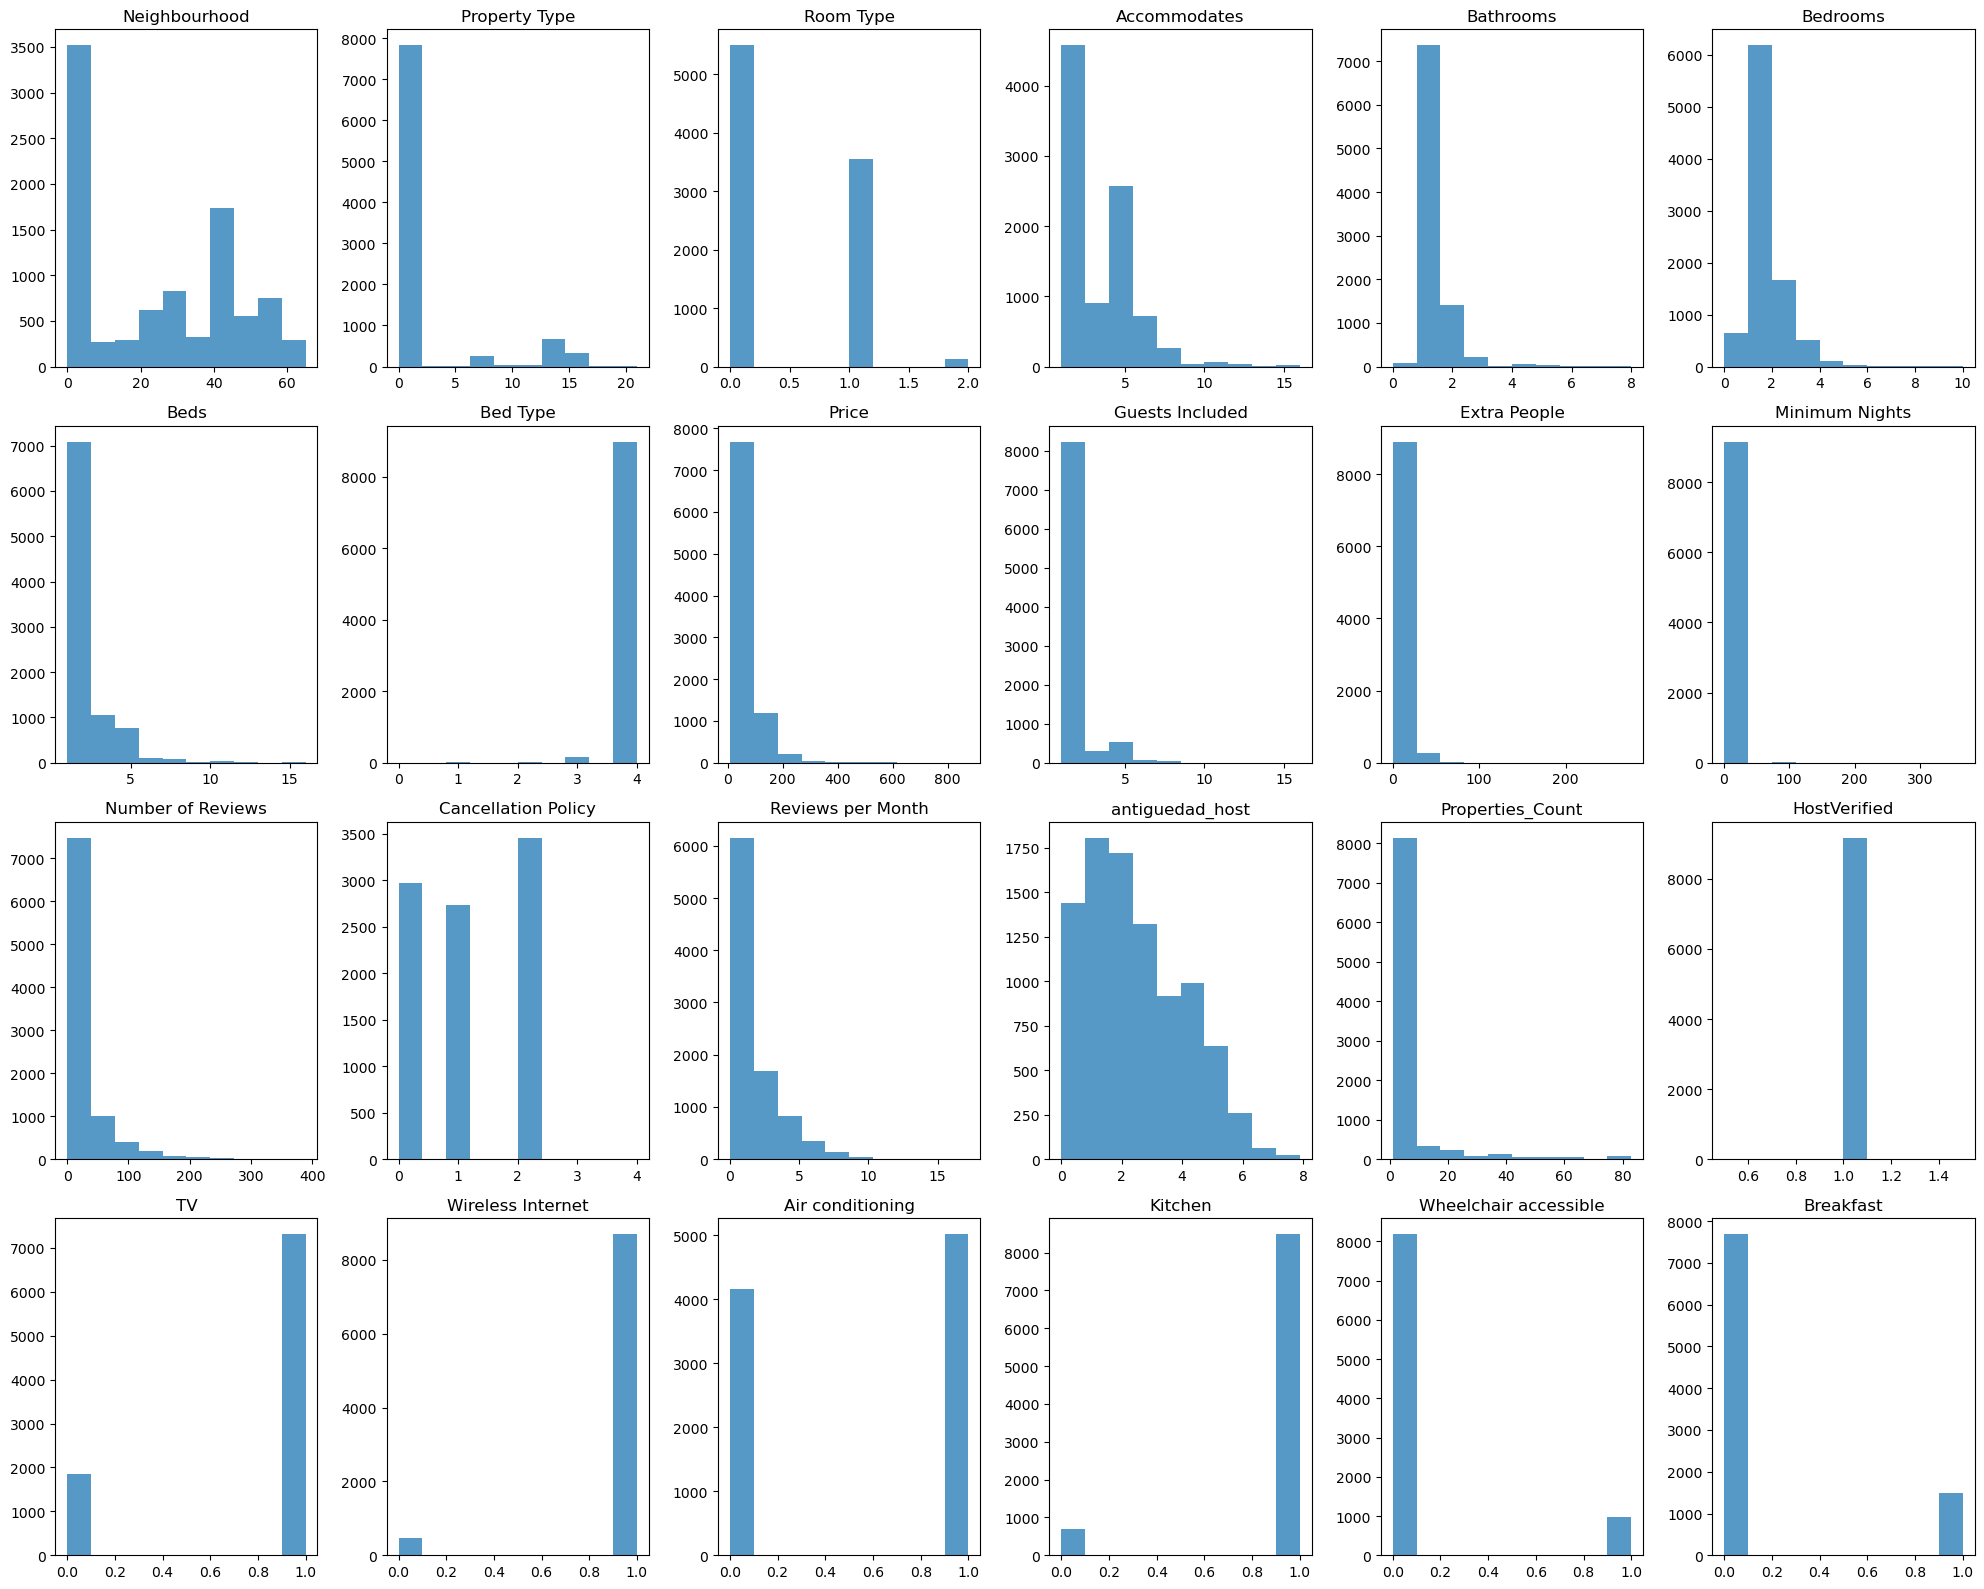

In [193]:
# Ahora pintamos histogramas para cada clase

import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))

columns_to_plot = df.columns.tolist()

num_plots = min(len(columns_to_plot), 24)

for i in range(num_plots):
    plt.subplot(4, 6, i + 1)
    column = columns_to_plot[i]
    plt.hist(df[column], density=0, alpha=0.75)
    plt.title(column)

plt.tight_layout()
plt.show()

In [194]:
print('Bed Type')
print(df['Bed Type'].value_counts())  # Parece que casi todas las camas son del mismo tipo. Puede que no sea interesante
print('Guests Included')
print(df['Guests Included'].value_counts())
print('Extra People')
print(df['Extra People'].value_counts())
print('Minimum Nights')
print(df['Minimum Nights'].value_counts())
print('HostVerified')
print(df['HostVerified'].value_counts()) # Todos los valores son 1, así que tampoco aporta.
print('Wireless Internet')
print(df['Wireless Internet'].value_counts()) # Prácticamente todos tiene Wifi, así que no la incluiremos
print('Kitchen')
print(df['Kitchen'].value_counts()) # Cerca del 95% tienen derecho a cocina, la excluiremos también
print('Wheelchair accessible')
print(df['Wheelchair accessible'].value_counts())
print('Breakfast')
print(df['Breakfast'].value_counts())
print('Number of Reviews')
print(df['Number of Reviews'].value_counts())



Bed Type
4    8980
3     155
2      24
1      11
0       4
Name: Bed Type, dtype: int64
Guests Included
1     5994
2     2238
4      467
3      291
6       76
5       55
7       20
8       19
10       6
12       2
15       2
9        2
16       1
14       1
Name: Guests Included, dtype: int64
Extra People
0      4644
10     1276
15      967
20      586
5       377
25      190
12      179
8       128
30      120
18       82
7        77
17       57
11       55
6        54
9        42
19       35
35       35
14       31
13       30
40       27
50       26
16       25
22       23
28       19
45       17
24       11
23        9
21        8
27        7
26        5
60        5
32        5
75        3
29        2
31        2
100       2
36        2
276       1
150       1
271       1
33        1
65        1
55        1
39        1
80        1
274       1
70        1
47        1
Name: Extra People, dtype: int64
Minimum Nights
2      3271
1      3157
3      1467
4       366
5       301
7       2

In [195]:
df.drop(['Bed Type', 'HostVerified', 'Wireless Internet', 'Kitchen'], axis = 1, inplace = True)

In [196]:
# Revisando los histogramas y value_counts, parece que podríamos generar algunas nuevas varibles que pueden tener relación

df['bed_bath_rooms']   = df['Bedrooms']*df['Bathrooms']
df['guests_extra_people']   = df['Guests Included']*df['Extra People']
df['properties_review']   = df['Properties_Count']*df['Number of Reviews']

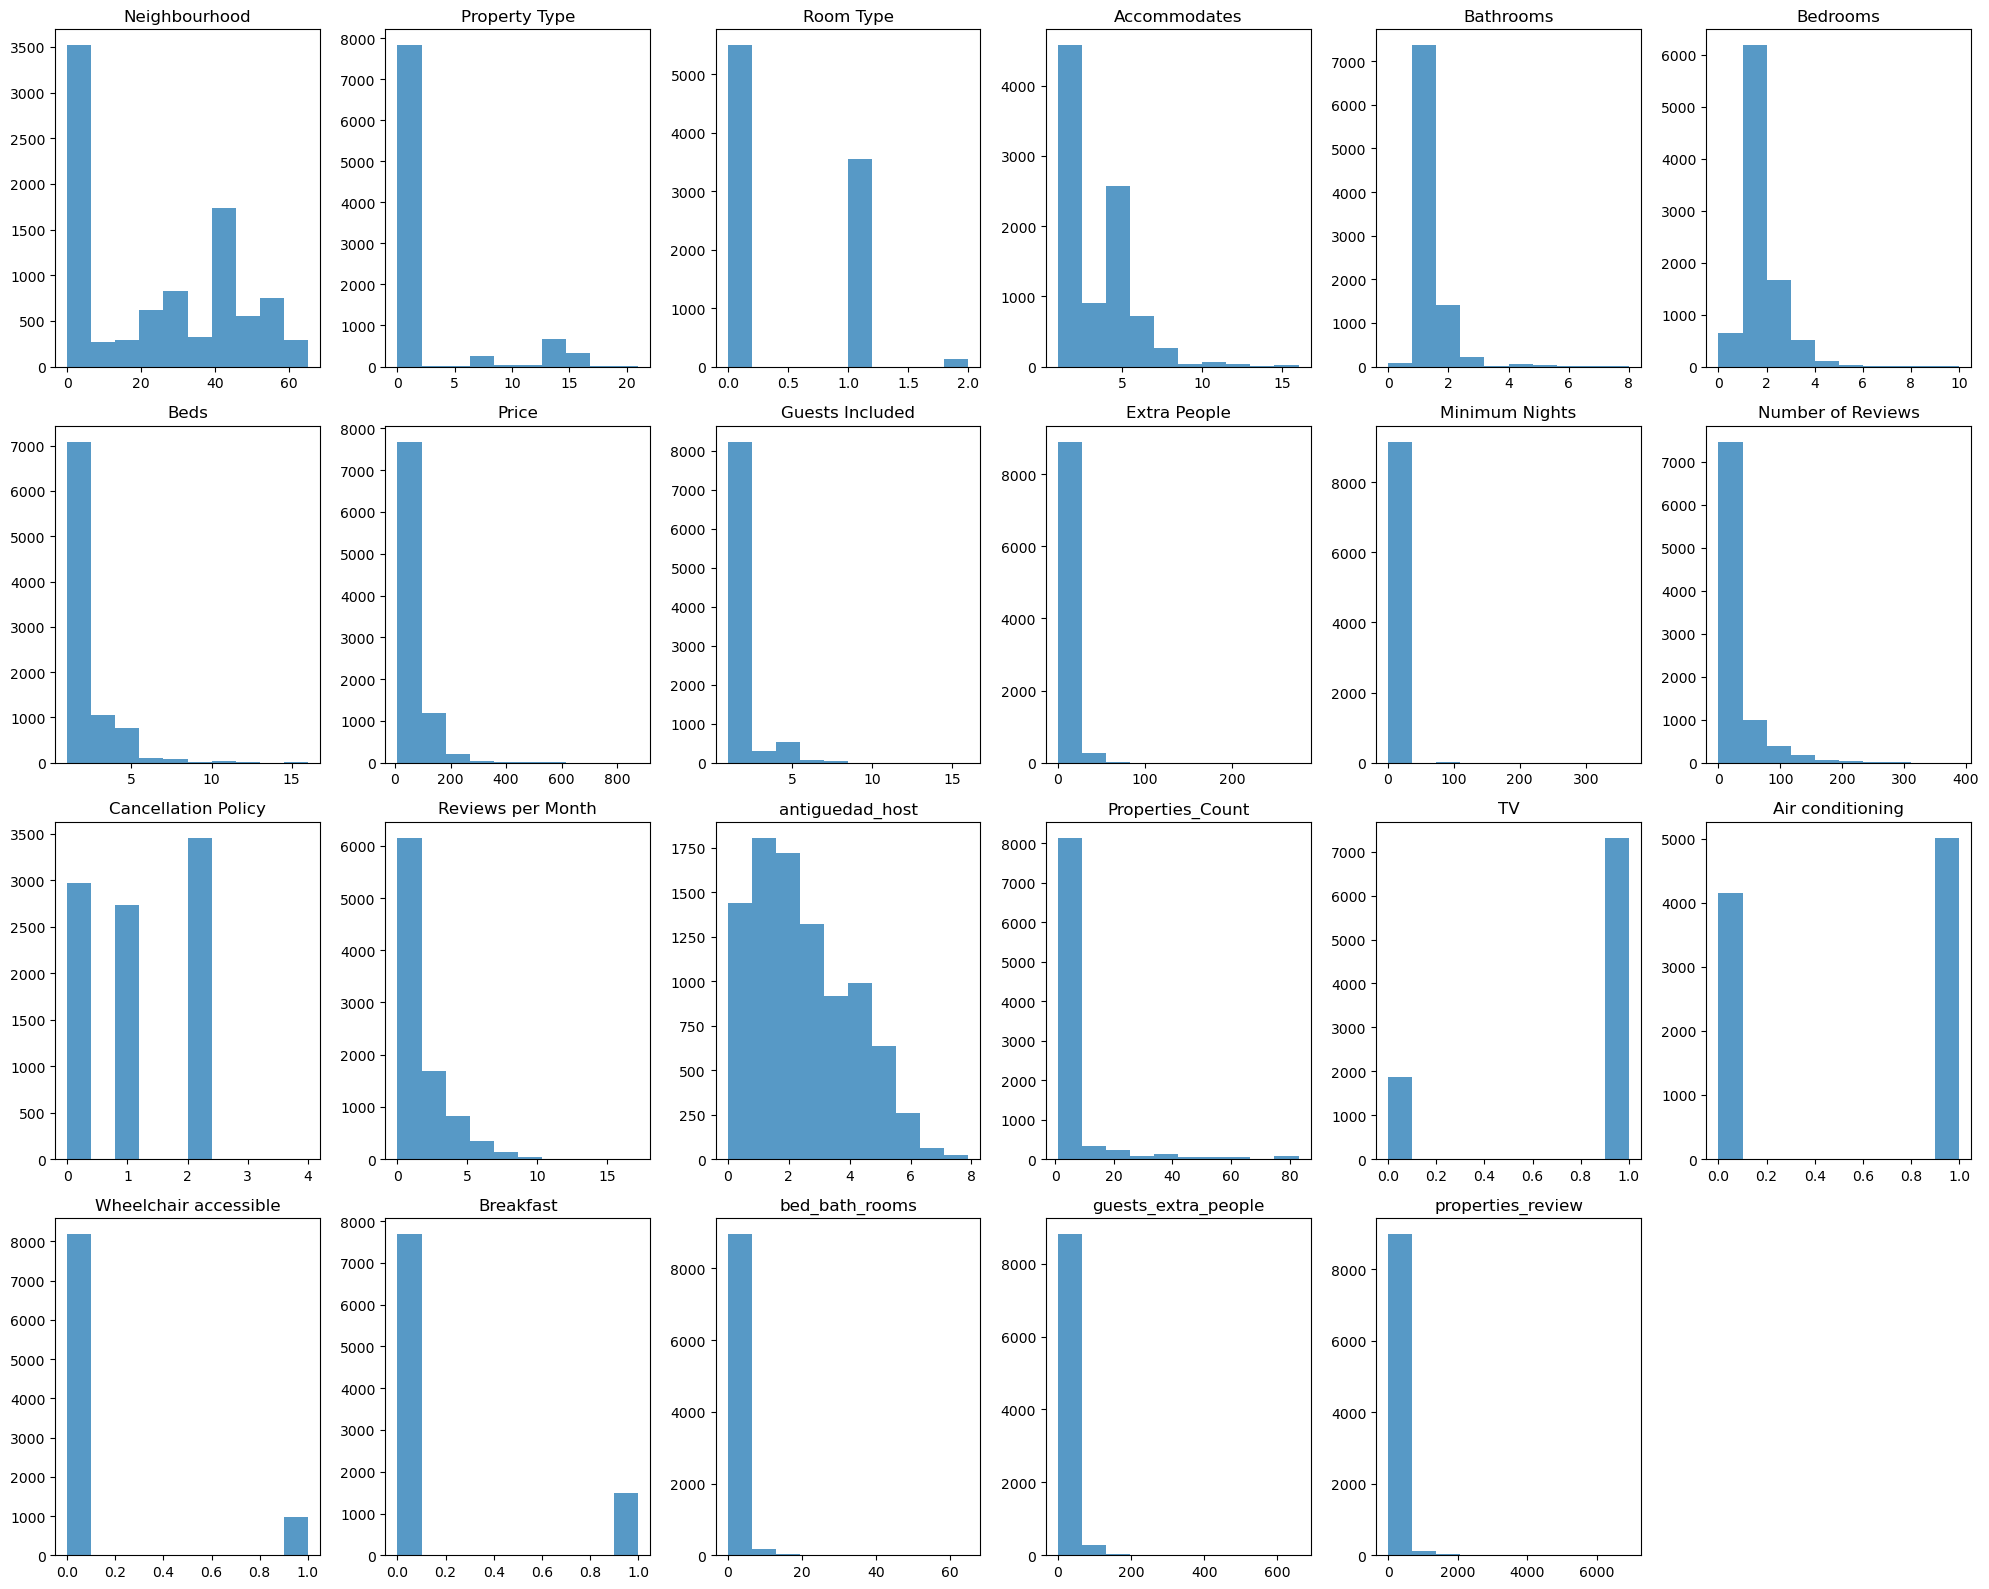

In [197]:
# Ahora pintamos los nuevos histogramas para cada clase

plt.figure(figsize=(20,16))

columns_to_plot = df.columns.tolist()

num_plots = min(len(columns_to_plot), 24)

for i in range(num_plots):
    plt.subplot(4, 6, i + 1)
    column = columns_to_plot[i]
    plt.hist(df[column], density=0, alpha=0.75)
    plt.title(column)

plt.tight_layout()
plt.show()

In [140]:
# Vamos a revisar outlayers en as variables que tenemos, ya que según los histogramas parece que puede haber algunos
# Nos centraremos en Beds, Extra People, Minimum Nigths, Number of Reviews, Reviews per Month, Properties_Count y las variables
# creadas bed_bath_rooms, guests_extra_people y properties_review

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,9174.0,23.401788,21.281020,0.00,0.000000,22.000000,43.000000,65.00000
Property Type,9174.0,1.937323,4.730373,0.00,0.000000,0.000000,0.000000,21.00000
Room Type,9174.0,0.415304,0.521394,0.00,0.000000,0.000000,1.000000,2.00000
Accommodates,9174.0,3.188358,1.968201,1.00,2.000000,3.000000,4.000000,16.00000
Bathrooms,9174.0,1.250273,0.597688,0.00,1.000000,1.000000,1.000000,8.00000
Bedrooms,9174.0,1.292239,0.829358,0.00,1.000000,1.000000,2.000000,10.00000
Beds,9174.0,1.981251,1.501581,1.00,1.000000,2.000000,2.000000,16.00000
Price,9174.0,65.678984,55.873705,9.00,31.000000,52.000000,80.000000,875.00000
Guests Included,9174.0,1.569217,1.080311,1.00,1.000000,1.000000,2.000000,16.00000
Extra People,9174.0,7.344125,10.520586,0.00,0.000000,0.000000,14.000000,276.00000


In [141]:
# Veremos los valores existentes
# Nos centraremos en Beds, Extra People, Minimum Nigths, Number of Reviews, Reviews per Month, Properties_Count y las variables
# creadas bed_bath_rooms, guests_extra_people y properties_review
print('Beds')
print(df['Beds'].value_counts())
print('Extra People')
print(df['Extra People'].value_counts())
print('Minimum Nights')
print(df['Minimum Nights'].value_counts())
print(df['Number of Reviews'].value_counts())
print('Reviews per Month')
print(df['Reviews per Month'].value_counts())
print('Properties_Count')
print(df['Properties_Count'].value_counts())
print('bed_bath_rooms')
print(df['bed_bath_rooms'].value_counts())
print('guests_extra_people')
print(df['guests_extra_people'].value_counts())
print('properties_review')
print(df['properties_review'].value_counts())

Beds
1.0     4564
2.0     2523
3.0     1049
4.0      555
5.0      204
6.0      116
8.0       46
7.0       44
10.0      29
9.0       20
16.0      10
12.0       7
11.0       2
14.0       2
15.0       2
13.0       1
Name: Beds, dtype: int64
Extra People
0      4644
10     1276
15      967
20      586
5       377
25      190
12      179
8       128
30      120
18       82
7        77
17       57
11       55
6        54
9        42
19       35
35       35
14       31
13       30
40       27
50       26
16       25
22       23
28       19
45       17
24       11
23        9
21        8
27        7
26        5
60        5
32        5
75        3
29        2
31        2
100       2
36        2
276       1
150       1
271       1
33        1
65        1
55        1
39        1
80        1
274       1
70        1
47        1
Name: Extra People, dtype: int64
Minimum Nights
2      3271
1      3157
3      1467
4       366
5       301
7       244
10      106
6        64
15       54
30       54
14   

Efectivamente hay valores muy extremos y muy minoritarios, que pueden desajustar todo el modelo

-Beds: Todos los valores por encima de 10 camas son muy minoritarios (<10) llegando a 16
-Extra People: Según el histograma y viendo los números, los valores por encima de 100 tienen una ocurrencia cada uno y se alejan mucho de los habituales
-Minimum Nights: Tiene un salto enorme del tercer al cuarto cuartil. Todos los valores por encima de 15 días tienen muy pocas apariciones o menos, frente a los miles de apariciones que tienen 1, 2, 3 noches
-Number of Reviews: Existe el mismo problema, hay un salto muy grande del tercer al cuarto cuartil. Los valores sobre 200 son muy raros
-Reviews per Month: El mismo caso de los anteriores. Son valores muy extraños por encima de 9
-Properties_Count: Este caso parece más frecuente al ver los datos uno a uno de lo que parecía en el histograma, lo dejaremos como está
-bed_bath_rooms: Parece que relaciones de baños * rooms por encima de 12 son muy raras, por lo que prescindiremos de ellas
-guests_extra_people: Las relaciones Guests included * Extra People por encima de 150 también parecen ser muy extrañas
-properties_review: Las relaciones entre properties_count * Number of reviews por encima de 1200 parecen claros outlayers
-Price: Parece que los valores por encima de 300 son valores que se salen mucho (el tercer cuartil es 80)

In [199]:
print(len(df))
print(len(df[df['Beds'] <= 10]))
print(len(df[df['Extra People'] <= 50]))
print(len(df[df['Minimum Nights'] <= 15]))
print(len(df[df['Number of Reviews'] <= 200]))
print(len(df[df['Reviews per Month'] <= 9]))
print(len(df[df['bed_bath_rooms'] <= 12]))
print(len(df[df['guests_extra_people'] <= 150]))
print(len(df[df['properties_review'] <= 1200]))
print(len(df[(df['Beds'] <= 10) & (df['Extra People'] <= 50) & (df['Minimum Nights'] <= 15) &
                 (df['Number of Reviews'] <= 200) & (df['Reviews per Month'] <= 9) & (df['bed_bath_rooms'] <= 12) &
                 (df['guests_extra_people'] <= 150) & (df['properties_review'] <= 1200) & (df['Price'] <= 250) ]))

# Vemos aquí cómo el número de valores que debemos reducir es muy pequeño. Filtrar todos estos valores nos reduce de
# 9174 filas a 8796, menos de un 3%

9174
9150
9156
9065
9112
9135
9123
9123
9099
8796


In [273]:
print(len(df))
print(df['Price'].value_counts())
print(len(df[df['Price'] > 250]))

8753
50.0     423
60.0     374
30.0     360
25.0     356
35.0     302
20.0     291
70.0     291
40.0     288
45.0     280
80.0     248
55.0     246
65.0     237
90.0     215
75.0     208
100.0    195
85.0     127
95.0     121
49.0     120
18.0     116
120.0    115
22.0     107
29.0     103
59.0     103
19.0     102
15.0      95
110.0     93
39.0      90
23.0      88
42.0      88
28.0      87
150.0     85
32.0      83
69.0      78
26.0      73
27.0      67
33.0      66
24.0      65
16.0      63
38.0      62
79.0      61
17.0      61
130.0     60
99.0      60
21.0      59
89.0      57
48.0      57
37.0      50
140.0     50
52.0      48
58.0      46
36.0      46
125.0     45
43.0      44
200.0     43
68.0      42
105.0     39
160.0     38
78.0      36
72.0      36
115.0     35
34.0      35
62.0      35
47.0      35
31.0      34
44.0      33
54.0      30
14.0      29
53.0      28
10.0      27
180.0     27
57.0      27
41.0      26
64.0      25
63.0      24
46.0      24
74.0      23
76.0   

In [200]:
df= df[(df['Beds'] <= 10) & (df['Extra People'] <= 50) & (df['Minimum Nights'] <= 15) &
                 (df['Number of Reviews'] <= 200) & (df['Reviews per Month'] <= 9) & (df['bed_bath_rooms'] <= 12) &
                 (df['guests_extra_people'] <= 150) & (df['properties_review'] <= 1200) & (df['Price'] <= 250)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,8796.0,23.167235,21.277332,0.00,0.000000,21.00000,41.000000,65.00000
Property Type,8796.0,1.951000,4.740975,0.00,0.000000,0.00000,0.000000,21.00000
Room Type,8796.0,0.422465,0.523699,0.00,0.000000,0.00000,1.000000,2.00000
Accommodates,8796.0,3.110391,1.801453,1.00,2.000000,2.00000,4.000000,16.00000
Bathrooms,8796.0,1.229650,0.545758,0.00,1.000000,1.00000,1.000000,6.00000
Bedrooms,8796.0,1.257844,0.734066,0.00,1.000000,1.00000,1.000000,10.00000
Beds,8796.0,1.915530,1.309529,1.00,1.000000,1.00000,2.000000,10.00000
Price,8796.0,63.501592,48.545504,9.00,30.000000,51.00000,80.000000,600.00000
Guests Included,8796.0,1.527626,0.949689,1.00,1.000000,1.00000,2.000000,16.00000
Extra People,8796.0,7.018076,8.675373,0.00,0.000000,0.00000,12.000000,50.00000


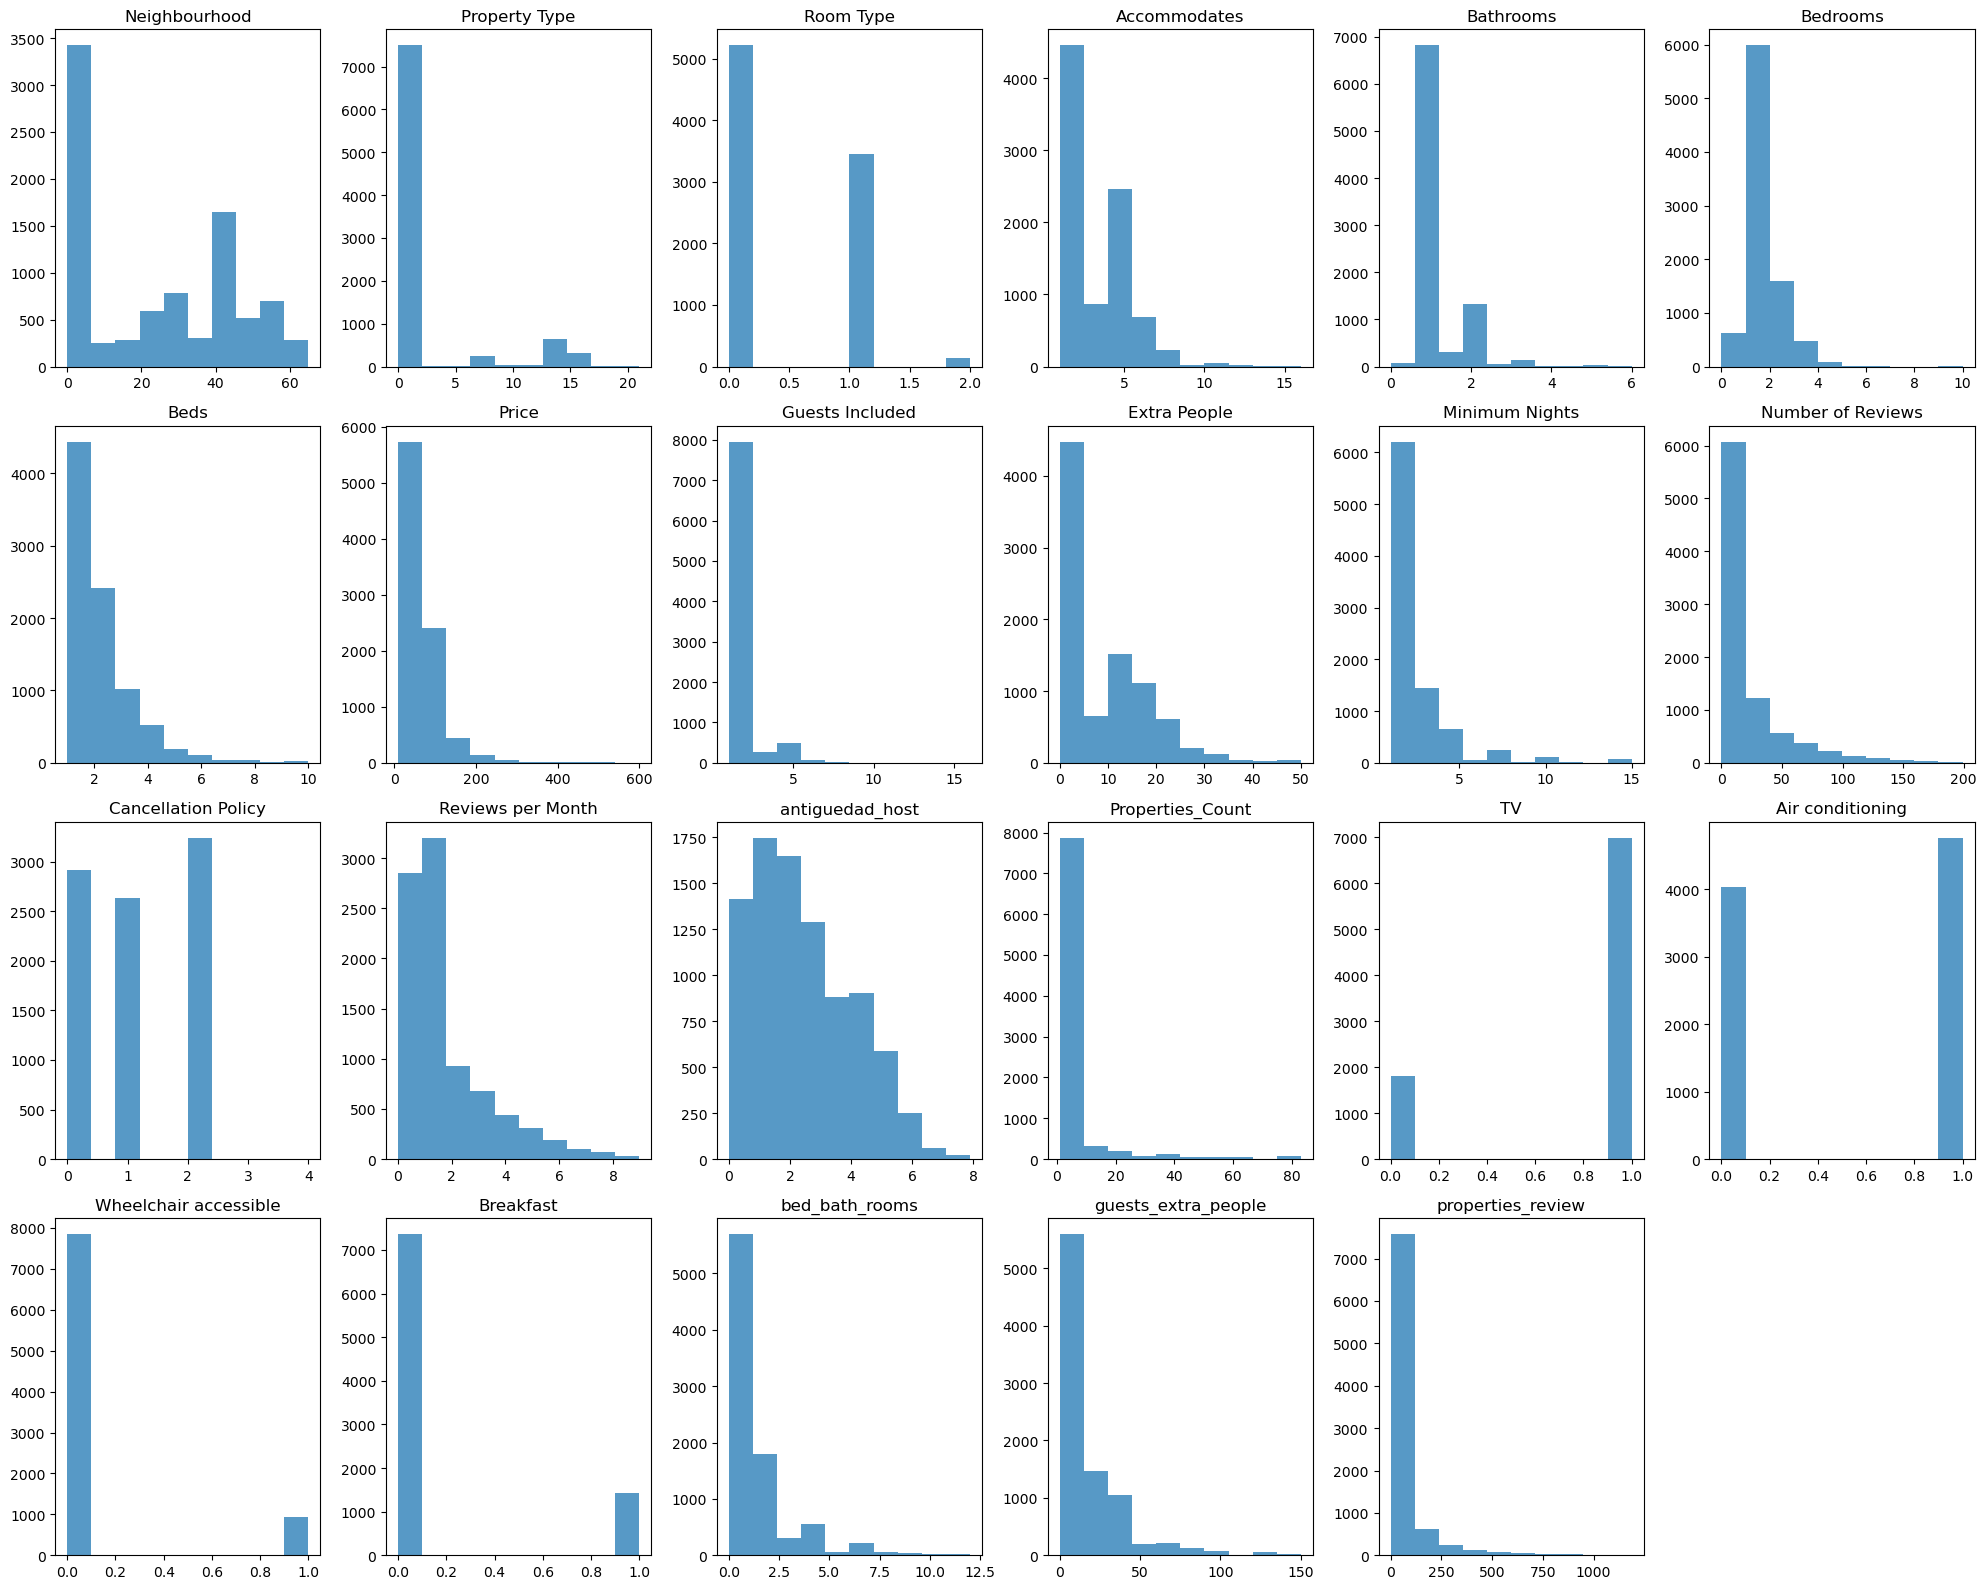

In [201]:
# Pintamos de nuevo los histogramas para cada clase

plt.figure(figsize=(20,16))

columns_to_plot = df.columns.tolist()

num_plots = min(len(columns_to_plot), 24)

for i in range(num_plots):
    plt.subplot(4, 6, i + 1)
    column = columns_to_plot[i]
    plt.hist(df[column], density=0, alpha=0.75)
    plt.title(column)

plt.tight_layout()
plt.show()

C:\Users\Conaf\AppData\Local\Temp\ipykernel_25536\1781757550.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


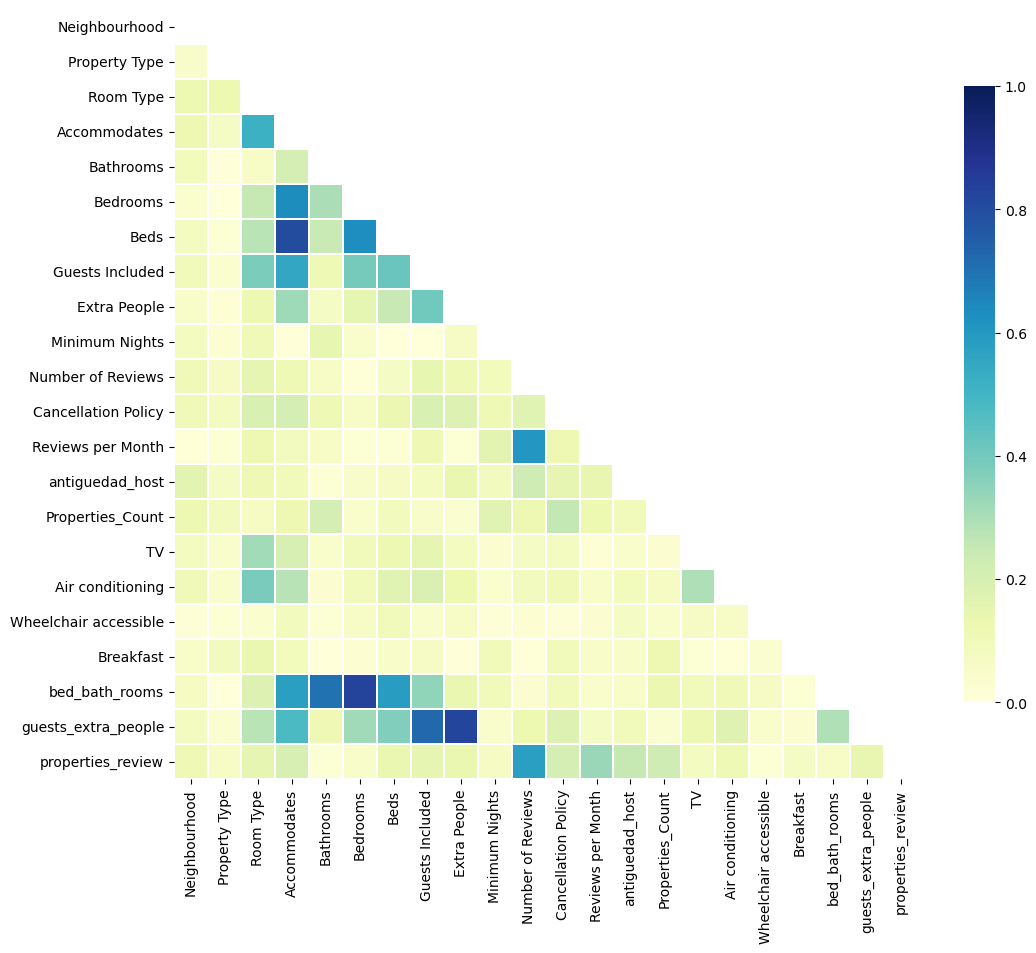

In [167]:
# Veamos la matriz de correlación
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()




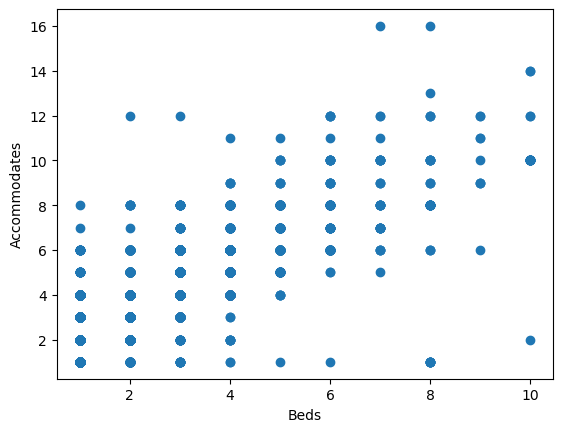

In [168]:
# Parece que Beds y Accomodates tienen una correlación alta, y Beds con bed_bath_rooms, pero observemos los resultado antes...

plt.scatter(df['Beds'], df['Accommodates'])
plt.xlabel('Beds')
plt.ylabel('Accommodates')
plt.show()

# Aunque no parece tan perfecta, considerando que es alta y que además Accommodates es dificil de entender su significado 
# en comparación a las otras, vamos a dejarla fuera de este análisis

#df.drop(['Accommodates'], axis = 1, inplace = True)


In [179]:
#########################################################################################################################

In [202]:
######  Una vez observados los resultados de los modelos, puede haber relaciones que hemos obviado, además de algunas variables
# que no aportan valor y aumentan la complejidad. 

# Vamos a eliminar esas variables
#variables_descartadas = ['Property Type', 'Minimum Nights', 'Cancellation Policy', 'Breakfast', 'TV', 'Wheelchair accessible', 'Air conditioning', 'Guests Included', 'properties_review']
variables_descartadas = ['Property Type', 'TV', 'Wheelchair accessible', 'Breakfast', 'Bathrooms', 'Cancellation Policy', 'Guests Included']
df.drop(variables_descartadas, axis = 1, inplace = True)

C:\Users\Conaf\AppData\Local\Temp\ipykernel_25536\2225401435.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


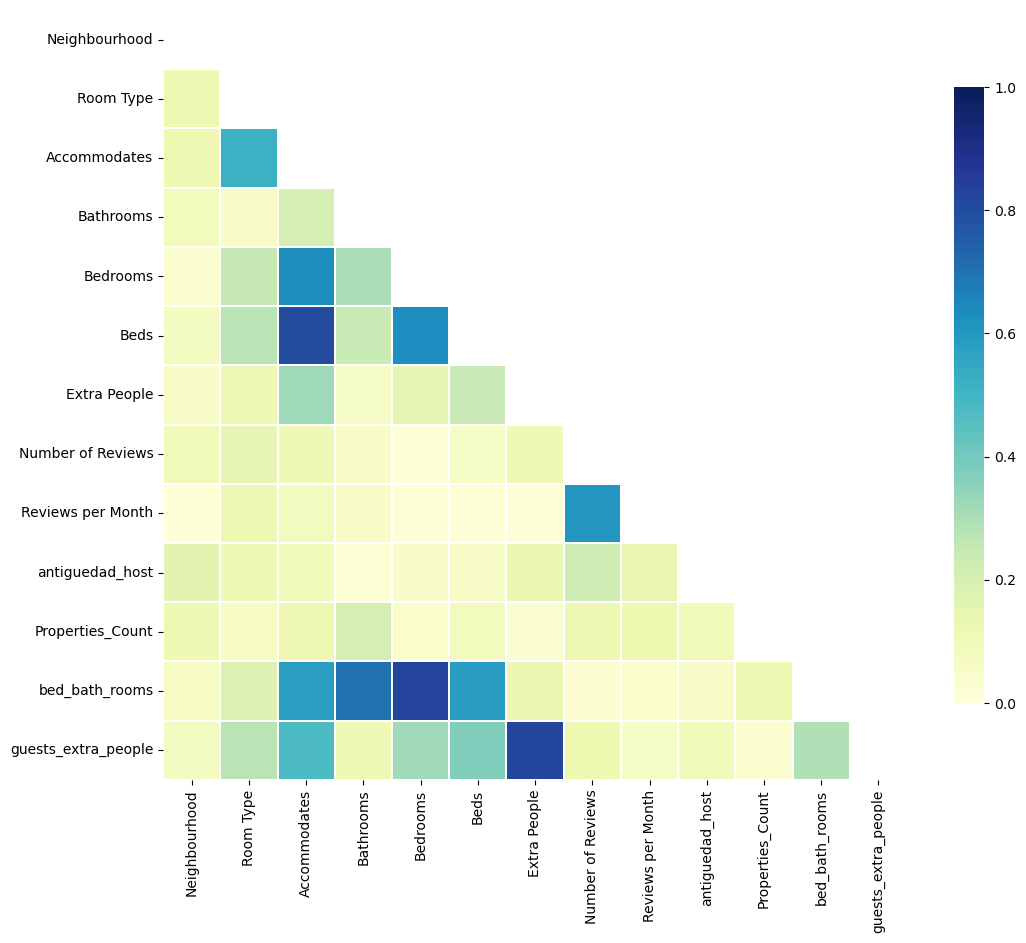

In [203]:
# Veamos de nuevo la matriz de correlación

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [307]:
# RESUMEN DEL ANÁLISIS EXPLORATORIO

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargo el df de train (no tiene las urls ya)
df = pd.read_csv('./train.csv', sep=';', decimal='.')

# Descartes iniciales en una primera exploración
descartes = ['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Host Name', 'Host Listings Count', 'Host Total Listings Count', 'Calendar last Scraped', 'Notes', 'Host Acceptance Rate', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License', 'Jurisdiction Names', 'Latitude', 'Longitude', 'Geolocation', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Transit', 'Access', 'Interaction', 'House Rules', 'House Rules', 'Host About', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Maximum Nights', 'Calendar Updated', 'First Review', 'Last Review', 'City', 'State', 'Market', 'Smart Location', 'Country Code', 'Country', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Calculated host listings count']
df.drop(descartes, axis = 1, inplace = True)

# La variable Experiences Offered parecía interesante, pero vemos que solo tenía valor None
df.drop('Experiences Offered', axis = 1, inplace = True)

# A partir de Host Since, creamos una variable que explica la antigüedad del host en AB&B, lo que podría tener significado en el precio
df['antiguedad_host'] = (pd.to_datetime(df['Host Since']).max() - pd.to_datetime(df['Host Since'])).dt.days / 365
df.drop('Host Since', axis = 1, inplace = True)

# Nuevos descartes tras analizar en profundidad los datos relacionados con Host y quedarnos con los considerados útiles
descartes2 = ['Host Location', 'Host Neighbourhood', 'Host Verifications', 'Host Response Time', 'Host Response Rate']
df.drop(descartes2, axis = 1, inplace = True)

# Podría ser significante la cantidad de propiedades que tiene cada propietario. Creamos una variable que lo calcula y ya
# podemos eliminar Host ID
df['Properties_Count'] = df['Host ID'].map(df['Host ID'].value_counts())
df.drop('Host ID', axis = 1, inplace = True)

# Observamos que Neighbourhood y Zipcode tienen bastantes valores nulos, pero si las ponemos en relación, podemos completar los
# barrios mediante los zipcodes, ya que cada barrio siempre tendrá unos zipcodes concretos.
# Creamos una lista que relaciona cada zipcode con su barrio, y de este modo, comprobando que no hay ninguna fila que tuviera
# tanto zipcode como Neighbourhood nulo, podemos completar los barrios que faltan gracias a su zipcode.
# Tras esto, eliminamos Zipcode que ya no nos sirve
barrios_zipcodes = df.dropna(subset=['Neighbourhood', 'Zipcode']).groupby('Neighbourhood')['Zipcode'].apply(list).to_dict()
df['Neighbourhood'] = df.apply(lambda row: ', '.join(barrios_zipcodes.get(row['Zipcode'], [])) if pd.isnull(row['Neighbourhood']) else row['Neighbourhood'], axis=1)
df.drop('Zipcode', axis = 1, inplace = True)

# En las Features, hay algunas opciones que podrían tener alguna relevancia, como que el Host esté verificado. Vamos
#  a separar aquellos en los que el host está verificado y los que no
df['HostVerified'] = df['Features'].str.contains('Host Identity Verified')
df['HostVerified'] = df['HostVerified'].notna().astype(int)

# En Amenities, vemos que existen variables que pueden ser relevantes. Nos quedaremos con TV, Wireless Internet, Air conditioning, Kitchen,
# Wheelchair accessible, Breakfast. Crearemos una variable binaria para cada una:
df['TV'] = df['Amenities'].str.contains('TV')
df['TV'] = df['TV'].fillna(False).astype(int)

df['Wireless Internet'] = df['Amenities'].str.contains('Wireless Internet')
df['Wireless Internet'] = df['Wireless Internet'].fillna(False).astype(int)

df['Air conditioning'] = df['Amenities'].str.contains('Air conditioning')
df['Air conditioning'] = df['Air conditioning'].fillna(False).astype(int)

df['Kitchen'] = df['Amenities'].str.contains('Kitchen')
df['Kitchen'] = df['Kitchen'].fillna(False).astype(int)

df['Wheelchair accessible'] = df['Amenities'].str.contains('Wheelchair accessible')
df['Wheelchair accessible'] = df['Wheelchair accessible'].fillna(False).astype(int)

df['Breakfast'] = df['Amenities'].str.contains('Breakfast')
df['Breakfast'] = df['Breakfast'].fillna(False).astype(int)

# Elimino Amenities tras sacar la información interesante
df.drop(['Amenities', 'Features'], axis = 1, inplace = True)

# Utilizamos LabelEncoder para codificar las variables no numéricas que nos interesan:
le_Neighbourhood = LabelEncoder()
le_Property = LabelEncoder()
le_Room = LabelEncoder()
le_Bed = LabelEncoder()
le_Cancellation = LabelEncoder()

df['Neighbourhood'] = le_Neighbourhood.fit_transform(df['Neighbourhood'])
df['Property Type'] = le_Property.fit_transform(df['Property Type'])
df['Room Type'] = le_Room.fit_transform(df['Room Type'])
df['Bed Type'] = le_Bed.fit_transform(df['Bed Type'])
df['Cancellation Policy'] = le_Cancellation.fit_transform(df['Cancellation Policy'])

# Tras analizar el grupo de variables Review, dropeamos las que no nos aportan valor (además tienen muchos nulos)
df.drop(['Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value'], axis = 1, inplace = True)

# Reviews per month parece podría tener alguna razón de ser, pero tiene nulos. En este caso podría ser una opción imputar la mediana a esos valores, 
# ya que es menos sensible a los valores extremos
df['Reviews per Month'] = df['Reviews per Month'].fillna(df['Reviews per Month'].median())

# Ahora, vemos que hay unos pocos valores en el dataset que tienen valores nulos. En concreto, son 70 de los 9244 iniciales,
# así que los vamos a eliminar
df = df.dropna()

# Tras una exploración visual a los histogramas de cada variable y ver los value counts de algunas que parecían tener poca
# o ninguna varieda en sus datos, eliminamos Bed Type, donde casi todos sus valores eran iguales y HostVerified que todos eran 1
df.drop(['Bed Type', 'HostVerified', 'Wireless Internet', 'Kitchen'], axis = 1, inplace = True)

# Revisando los histogramas y value_counts, parece que podríamos generar nuevas variables que pueden tener relación
df['bed_bath_rooms']   = df['Bedrooms']*df['Bathrooms']
df['guests_extra_people']   = df['Guests Included']*df['Extra People']
df['properties_review']   = df['Properties_Count']*df['Number of Reviews']

# Tras revisar los histogramas, cuartiles y conteos, vamos a eliminar algunos outlayers (<2% entre la suma de todos)

df= df[(df['Beds'] <= 11) & (df['Extra People'] <= 100) & (df['Minimum Nights'] <= 28) &
                 (df['Number of Reviews'] <= 200) & (df['Reviews per Month'] <= 10) & (df['bed_bath_rooms'] <= 36) &
                 (df['guests_extra_people'] <= 300) & (df['properties_review'] <= 1500) & (df['Price'] <= 250)]

# Finalmente, tras observar la matriz de correlación, decidimos eliminar también Accommodates, al tener una alta correlación con
# beds
#df.drop(['Accommodates'], axis = 1, inplace = True)

######  Una vez observados los resultados de los modelos, puede haber relaciones que hemos obviado, además de algunas variables
# que no aportan valor y aumentan la complejidad. 

# Vamos a eliminar esas variables
#variables_descartadas = ['Property Type', 'Minimum Nights', 'Cancellation Policy', 'Breakfast', 'TV', 'Wheelchair accessible', 'Air conditioning', 'Guests Included', 'properties_review']
variables_descartadas = ['Property Type', 'TV', 'Wheelchair accessible', 'Breakfast', 'Bathrooms', 'Cancellation Policy', 'Guests Included']
df.drop(variables_descartadas, axis = 1, inplace = True)


print(df.shape)
df.head()

(8859, 16)


C:\Users\Conaf\AppData\Local\Temp\ipykernel_25536\2300229517.py:8: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./train.csv', sep=';', decimal='.')


,Neighbourhood,Room Type,Accommodates,Bedrooms,Beds,Price,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,antiguedad_host,Properties_Count,Air conditioning,bed_bath_rooms,guests_extra_people,properties_review
0,0,0,4,1.0,2.0,60.0,0,2,53,3.05,1.463014,1,1,1.0,0,53
1,21,0,3,0.0,2.0,45.0,10,1,49,2.37,1.769863,1,0,0.0,20,49
2,5,1,2,1.0,1.0,20.0,0,2,3,3.00,0.336986,4,0,2.0,0,12
4,0,0,5,3.0,5.0,95.0,20,1,34,1.87,1.671233,1,1,3.0,80,34
5,0,1,3,1.0,2.0,50.0,18,2,1,0.18,0.610959,1,0,2.0,36,1


Price
50.0     423
60.0     374
30.0     360
25.0     356
35.0     302
20.0     291
70.0     291
40.0     288
45.0     280
80.0     248
55.0     246
65.0     237
90.0     215
75.0     208
100.0    195
85.0     127
95.0     121
49.0     120
18.0     116
120.0    115
22.0     107
29.0     103
59.0     103
19.0     102
15.0      95
110.0     93
39.0      90
42.0      88
23.0      88
28.0      87
150.0     85
32.0      83
69.0      78
26.0      73
27.0      67
33.0      66
24.0      65
16.0      63
38.0      62
17.0      61
79.0      61
130.0     60
99.0      60
21.0      59
48.0      57
89.0      57
37.0      50
140.0     50
52.0      48
58.0      46
36.0      46
125.0     45
43.0      44
200.0     43
68.0      42
105.0     39
160.0     38
72.0      36
78.0      36
115.0     35
34.0      35
62.0      35
47.0      35
31.0      34
44.0      33
54.0      30
14.0      29
53.0      28
180.0     27
57.0      27
10.0      27
41.0      26
64.0      25
63.0      24
46.0      24
74.0      23
11.0  

In [308]:
# APLICO EL ANÁLISIS A TEST

# Cargo el df de train (no tiene las urls ya)
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Descartes iniciales en una primera exploración
descartes = ['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Host Name', 'Host Listings Count', 'Host Total Listings Count', 'Calendar last Scraped', 'Notes', 'Host Acceptance Rate', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License', 'Jurisdiction Names', 'Latitude', 'Longitude', 'Geolocation', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Transit', 'Access', 'Interaction', 'House Rules', 'House Rules', 'Host About', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Maximum Nights', 'Calendar Updated', 'First Review', 'Last Review', 'City', 'State', 'Market', 'Smart Location', 'Country Code', 'Country', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Calculated host listings count']
df_test.drop(descartes, axis = 1, inplace = True)

# La variable Experiences Offered parecía interesante, pero vemos que solo tenía valor None
df_test.drop('Experiences Offered', axis = 1, inplace = True)

# A partir de Host Since, creamos una variable que explica la antigüedad del host en AB&B, lo que podría tener significado en el precio
df_test['antiguedad_host'] = (pd.to_datetime(df_test['Host Since']).max() - pd.to_datetime(df_test['Host Since'])).dt.days / 365
df_test.drop('Host Since', axis = 1, inplace = True)

# Nuevos descartes tras analizar en profundidad los datos relacionados con Host y quedarnos con los considerados útiles
descartes2 = ['Host Location', 'Host Neighbourhood', 'Host Verifications', 'Host Response Time', 'Host Response Rate']
df_test.drop(descartes2, axis = 1, inplace = True)

# Podría ser significante la cantidad de propiedades que tiene cada propietario. Creamos una variable que lo calcula y ya
# podemos eliminar Host ID
df_test['Properties_Count'] = df_test['Host ID'].map(df_test['Host ID'].value_counts())
df_test.drop('Host ID', axis = 1, inplace = True)

# Observamos que Neighbourhood y Zipcode tienen bastantes valores nulos, pero si las ponemos en relación, podemos completar los
# barrios mediante los zipcodes, ya que cada barrio siempre tendrá unos zipcodes concretos.
# Creamos una lista que relaciona cada zipcode con su barrio, y de este modo, comprobando que no hay ninguna fila que tuviera
# tanto zipcode como Neighbourhood nulo, podemos completar los barrios que faltan gracias a su zipcode.
# Tras esto, eliminamos Zipcode que ya no nos sirve
barrios_zipcodes = df_test.dropna(subset=['Neighbourhood', 'Zipcode']).groupby('Neighbourhood')['Zipcode'].apply(list).to_dict()
df_test['Neighbourhood'] = df_test.apply(lambda row: ', '.join(barrios_zipcodes.get(row['Zipcode'], [])) if pd.isnull(row['Neighbourhood']) else row['Neighbourhood'], axis=1)
df_test.drop('Zipcode', axis = 1, inplace = True)

# En las Features, hay algunas opciones que podrían tener alguna relevancia, como que el Host esté verificado. Vamos
#  a separar aquellos en los que el host está verificado y los que no
df_test['HostVerified'] = df_test['Features'].str.contains('Host Identity Verified')
df_test['HostVerified'] = df_test['HostVerified'].notna().astype(int)

# En Amenities, vemos que existen variables que pueden ser relevantes. Nos quedaremos con TV, Wireless Internet, Air conditioning, Kitchen,
# Wheelchair accessible, Breakfast. Crearemos una variable binaria para cada una:
df_test['TV'] = df_test['Amenities'].str.contains('TV')
df_test['TV'] = df_test['TV'].fillna(False).astype(int)

df_test['Wireless Internet'] = df_test['Amenities'].str.contains('Wireless Internet')
df_test['Wireless Internet'] = df_test['Wireless Internet'].fillna(False).astype(int)

df_test['Air conditioning'] = df_test['Amenities'].str.contains('Air conditioning')
df_test['Air conditioning'] = df_test['Air conditioning'].fillna(False).astype(int)

df_test['Kitchen'] = df_test['Amenities'].str.contains('Kitchen')
df_test['Kitchen'] = df_test['Kitchen'].fillna(False).astype(int)

df_test['Wheelchair accessible'] = df_test['Amenities'].str.contains('Wheelchair accessible')
df_test['Wheelchair accessible'] = df_test['Wheelchair accessible'].fillna(False).astype(int)

df_test['Breakfast'] = df_test['Amenities'].str.contains('Breakfast')
df_test['Breakfast'] = df_test['Breakfast'].fillna(False).astype(int)

# Elimino Amenities tras sacar la información interesante
df_test.drop(['Amenities', 'Features'], axis = 1, inplace = True)

# Utilizamos LabelEncoder para codificar las variables no numéricas que nos interesan:
le_Neighbourhood = LabelEncoder()
le_Property = LabelEncoder()
le_Room = LabelEncoder()
le_Bed = LabelEncoder()
le_Cancellation = LabelEncoder()

df_test['Neighbourhood'] = le_Neighbourhood.fit_transform(df_test['Neighbourhood'])
df_test['Property Type'] = le_Property.fit_transform(df_test['Property Type'])
df_test['Room Type'] = le_Room.fit_transform(df_test['Room Type'])
df_test['Bed Type'] = le_Bed.fit_transform(df_test['Bed Type'])
df_test['Cancellation Policy'] = le_Cancellation.fit_transform(df_test['Cancellation Policy'])

# Tras analizar el grupo de variables Review, dropeamos las que no nos aportan valor (además tienen muchos nulos)
df_test.drop(['Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value'], axis = 1, inplace = True)

# Reviews per month parece podría tener alguna razón de ser, pero tiene nulos. En este caso podría ser una opción imputar la mediana a esos valores, 
# ya que es menos sensible a los valores extremos
df_test['Reviews per Month'] = df_test['Reviews per Month'].fillna(df_test['Reviews per Month'].median())

# Ahora, vemos que hay unos pocos valores en el dataset que tienen valores nulos. En concreto, son 70 de los 9244 iniciales,
# así que los vamos a eliminar
df_test = df_test.dropna()

# Tras una exploración visual a los histogramas de cada variable y ver los value counts de algunas que parecían tener poca
# o ninguna varieda en sus datos, eliminamos Bed Type, donde casi todos sus valores eran iguales y HostVerified que todos eran 1
df_test.drop(['Bed Type', 'HostVerified', 'Wireless Internet', 'Kitchen'], axis = 1, inplace = True)

# Revisando los histogramas y value_counts, parece que podríamos generar una nueva variable que pueden tener relación
df_test['bed_bath_rooms']   = df_test['Bedrooms']*df_test['Bathrooms']
df_test['guests_extra_people']   = df_test['Guests Included']*df_test['Extra People']
df_test['properties_review']   = df_test['Properties_Count']*df_test['Number of Reviews']

# Tras revisar los histogramas, cuartiles y conteos, vamos a eliminar algunos outlayers (<2% entre la suma de todos)
df_test= df_test[(df_test['Beds'] <= 11) & (df_test['Extra People'] <= 100) & (df_test['Minimum Nights'] <= 28) &
                 (df_test['Number of Reviews'] <= 200) & (df_test['Reviews per Month'] <= 10) & (df_test['bed_bath_rooms'] <= 36) &
                 (df_test['guests_extra_people'] <= 300) & (df_test['properties_review'] <= 1500) & (df_test['Price'] <= 250)]

# Finalmente, tras observar la matriz de correlación, decidimos eliminar también Accommodates, al tener una alta correlación con
# beds
#df_test.drop(['Accommodates'], axis = 1, inplace = True)


######  Una vez observados los resultados de los modelos, puede haber relaciones que hemos obviado, además de algunas variables
# que no aportan valor y aumentan la complejidad. 

# Vamos a eliminar esas variables
#variables_descartadas = ['Property Type', 'Minimum Nights', 'Cancellation Policy', 'Breakfast', 'TV', 'Wheelchair accessible', 'Air conditioning', 'Guests Included', 'properties_review']
variables_descartadas = ['Property Type', 'TV', 'Wheelchair accessible', 'Breakfast', 'Bathrooms', 'Cancellation Policy', 'Guests Included']
df_test.drop(variables_descartadas, axis = 1, inplace = True)


print(df_test.shape)
df_test.head()


(3802, 16)


,Neighbourhood,Room Type,Accommodates,Bedrooms,Beds,Price,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,antiguedad_host,Properties_Count,Air conditioning,bed_bath_rooms,guests_extra_people,properties_review
0,0,0,4,1.0,2.0,163.0,0,3,0,1.27,0.712329,4,1,1.0,0,0
1,0,1,2,1.0,1.0,40.0,10,1,0,1.27,1.419178,1,0,1.0,10,0
2,0,0,4,1.0,2.0,55.0,7,2,12,3.21,0.347945,1,0,1.0,14,12
3,56,0,4,0.0,2.0,65.0,15,1,87,3.09,5.386301,5,1,0.0,30,435
4,0,1,2,1.0,1.0,15.0,15,1,3,0.99,0.430137,1,0,2.0,15,3


In [309]:
# Preparamos los datos

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

features = df.columns.drop(['Price'])
X = df[features].values
y = df['Price'].values

print('Filas, Columnas', X.shape)

Filas, Columnas (8859, 15)


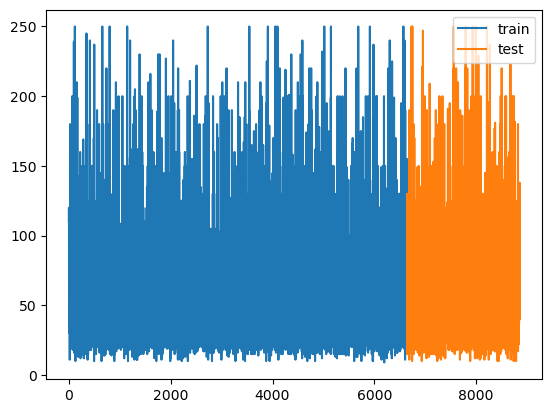

In [310]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y)),y_test,label='test')
plt.legend()
plt.show()

best mean cross-validation score: 0.576
best parameters: {'alpha': 100.0}


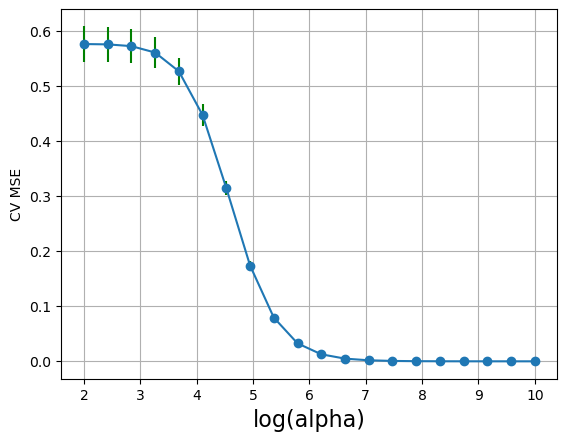

In [311]:
# Vamos a entrenar en primer lugar un algoritmo de regresión lineal

# Comenzaremos implementando Ridge

from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

# Calcular valor óptimo de alpha

alpha_vector = np.logspace(2, 10, 20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Ridge(), param_grid = param_grid, cv = 10)
grid.fit(X_train, y_train)


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()




In [312]:
# Ahora entrenamos el modelo con el valor de alpha óptimo de Cross Validation y vemos los coeficientes

best_alpha = grid.best_params_['alpha']
rm = Ridge(alpha = best_alpha).fit(X_train, y_train)

coefficient_names = dict(zip(features, rm.coef_))

for feature, coefficient in coefficient_names.items():
    print(f"{feature}: {coefficient}")


Neighbourhood: 2.242650501098383
Room Type: -13.986452579310452
Accommodates: 9.030152390375244
Bedrooms: 2.0954913545213656
Beds: -0.5074038644340093
Extra People: -7.306862419164291
Minimum Nights: -1.5839904423524558
Number of Reviews: -2.241138714789042
Reviews per Month: -2.1233985094369086
antiguedad_host: 1.511789717264234
Properties_Count: 2.5275463692031535
Air conditioning: 5.409253627010635
bed_bath_rooms: 8.174057449887645
guests_extra_people: 7.411005807956281
properties_review: -0.46999746022032507


MSE train: 672.444
MSE test: 690.350
R2 train: 0.578
R2 test: 0.582


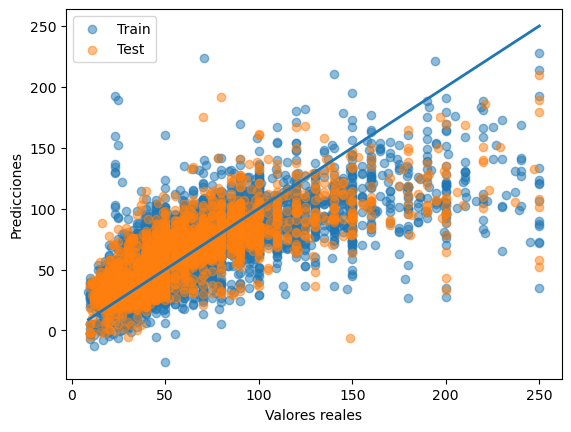

In [313]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = rm.predict(X_train)
y_test_pred = rm.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE train: {:.3f}".format(mse_train))
print("MSE test: {:.3f}".format(mse_test))
print("R2 train: {:.3f}".format(r2_train))
print("R2 test: {:.3f}".format(r2_test))

plt.scatter(y_train, y_train_pred, label = 'Train', alpha = 0.5)
plt.scatter(y_test, y_test_pred, label = 'Test', alpha = 0.5)

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], lw=2)

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')

plt.legend()
plt.show()

best mean cross-validation score: -676.603
best parameters: {'alpha': 0.0069519279617756054}


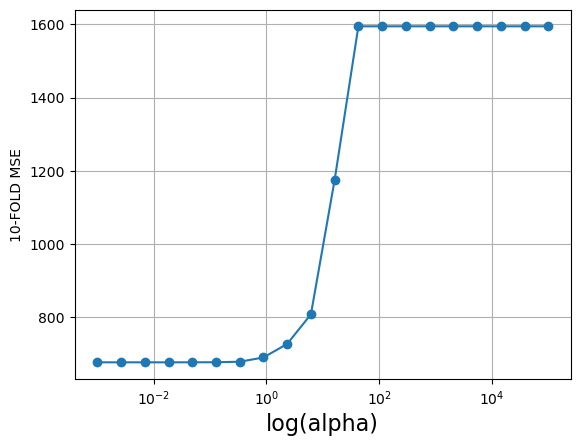

In [314]:
# Veamos con Lasso

from sklearn.linear_model import Lasso

# Calcular valor óptimo de alpha

alpha_vector = np.logspace(-3, 5, 20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), scoring = 'neg_mean_squared_error', param_grid = param_grid, cv = 10)
grid.fit(X_train, y_train)


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('10-FOLD MSE')
plt.grid()
plt.show()


Neighbourhood: 2.242650501098383
Room Type: -13.986452579310452
Accommodates: 9.030152390375244
Bedrooms: 2.0954913545213656
Beds: -0.5074038644340093
Extra People: -7.306862419164291
Minimum Nights: -1.5839904423524558
Number of Reviews: -2.241138714789042
Reviews per Month: -2.1233985094369086
antiguedad_host: 1.511789717264234
Properties_Count: 2.5275463692031535
Air conditioning: 5.409253627010635
bed_bath_rooms: 8.174057449887645
guests_extra_people: 7.411005807956281
properties_review: -0.46999746022032507

MSE Lasso train: 672.227
MSE Lasso test: 691.136
R2 Lasso train: 0.578
R2 Lasso test: 0.581


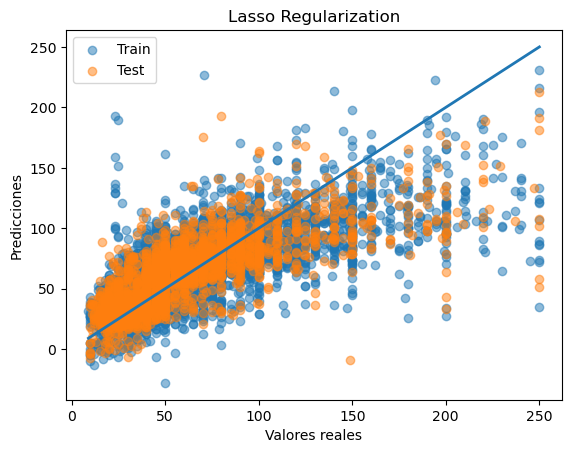

In [315]:
best_alpha = grid.best_params_['alpha']

lasso = Lasso(alpha = best_alpha).fit(X_train, y_train)

coefficient_names = dict(zip(features, rm.coef_))

for feature, coefficient in coefficient_names.items():
    print(f"{feature}: {coefficient}")

    
    
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("")
print("MSE Lasso train: {:.3f}".format(mse_train))
print("MSE Lasso test: {:.3f}".format(mse_test))
print("R2 Lasso train: {:.3f}".format(r2_train))
print("R2 Lasso test: {:.3f}".format(r2_test))

plt.scatter(y_train, y_train_pred, label = 'Train', alpha = 0.5)
plt.scatter(y_test, y_test_pred, label = 'Test', alpha = 0.5)
plt.title("Lasso Regularization")

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], lw=2)

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')

plt.legend()
plt.show()    


Vamos a estudiar más de cerca las variables que tienen coeficientes entre (-1, 1), cercanos a 0, comparando con diferentes modelos. En concreto nos están diciendo que Beds es muy poco significativa

Por ahora todas ellas son coincidentes tanto con la regularización Ridge como con Lasso

In [261]:
# Vamos a trabajar ahora con Random Forest

from sklearn.ensemble import RandomForestRegressor

# Grid search
maxDepth = range(1, 30)
n_estimators = [100, 200, 300, 500, 1000, 1500, 2000]
tuned_parameters = {'max_depth': maxDepth, 'n_estimators': n_estimators}
#tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state = 0, max_features ='sqrt'), param_grid = tuned_parameters, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'][:len(maxDepth)])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

KeyboardInterrupt: 

In [82]:
# Tras varias pruebas ha dado de forma constante que el mejor n_iterators = 12 y max_depth = 12
# Vamos a colocarlos de forma manual para acelerar el proceso
# Vamos a bajar ya que parece que hay overfitting
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = 6

n_estimatorsOptimo = grid.best_params_['n_estimators']
rf = RandomForestRegressor(max_depth = maxDepthOptimo, n_estimators = n_estimatorsOptimo , max_features='sqrt').fit(X_train, y_train)
# Bajamos a 6 porque parece que con max_depth hay bastante overfitting 

print("Train: ",rf.score(X_train,y_train))
print("Test: ",rf.score(X_test,y_test))

Train:  0.5841714231934931
Test:  0.5396260866583493


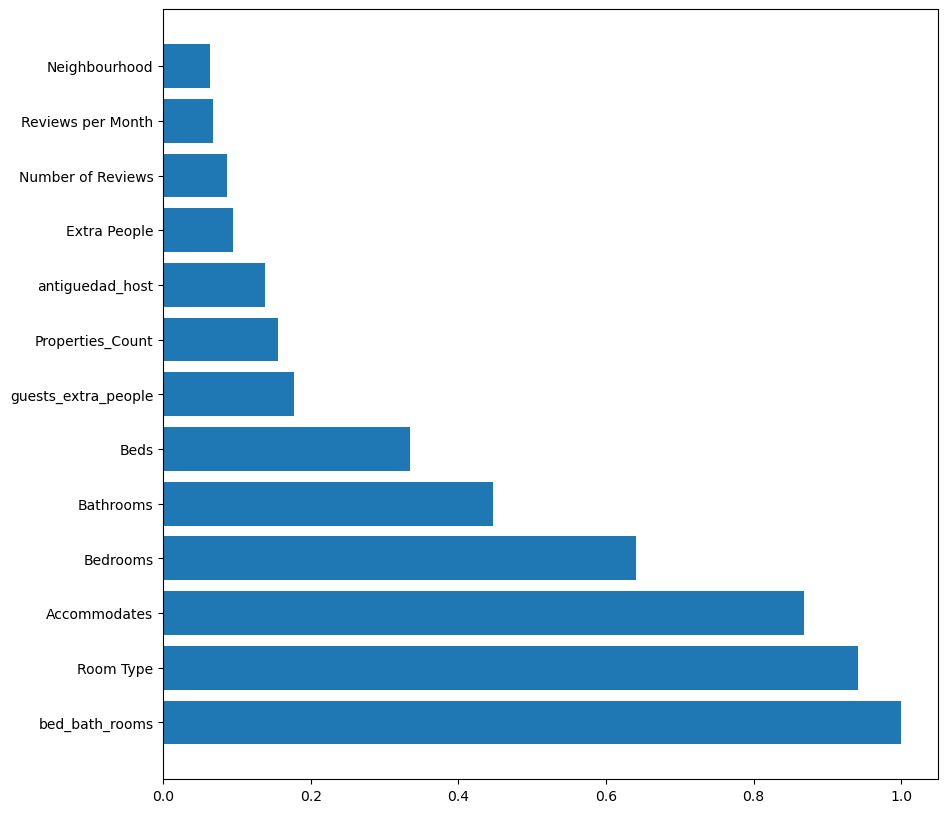

In [83]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), features[indices])
plt.show()

In [89]:
# Vamos a hacer una selección de características para mejorar el modelo

from sklearn.feature_selection import SelectFromModel

importances = grid.best_estimator_

feature_importances = importances.feature_importances_
model = SelectFromModel(importances, prefit=True) # Utilizamos el modelo preentrenado
X_train_selected = model.transform(X_train)

new_rf = RandomForestRegressor(random_state=0, max_depth=6, n_estimators=grid.best_params_['n_estimators'], max_features='sqrt')
new_rf.fit(X_train_selected, y_train)

X_test_selected = model.transform(X_test)
print("Train: ",new_rf.score(X_train_selected, y_train))
print("Test: ",new_rf.score(X_test_selected, y_test))

Train:  0.5360093807426523
Test:  0.4776191506606994


In [75]:
# Vamos a trabajar con Boosted Trees

from sklearn.ensemble import GradientBoostingRegressor

Niterations = [100, 200, 300, 500]
learningRate = [0.1, 0.05, 0.01]
maxDepth = 10
param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}

grid = GridSearchCV(GradientBoostingRegressor(random_state = 0, max_depth = maxDepth), param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.439
best parameters: {'learning_rate': 0.01, 'n_estimators': 200}


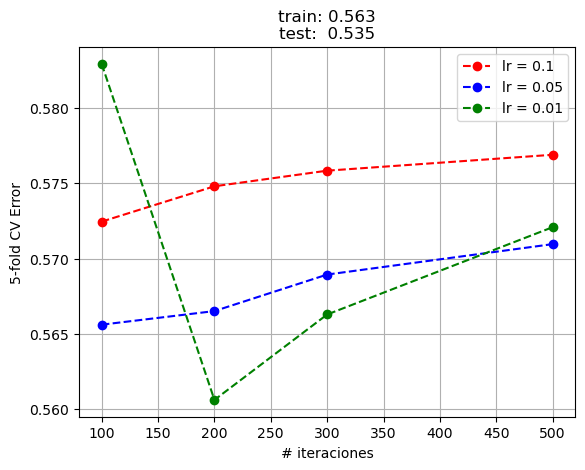

In [100]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state = 0, max_depth = 4, learning_rate = lrOptimo, n_estimators = neOptimo,
                              alpha=0.5)
bt.fit(X_train, y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))
colors = ['r','b','g','k','m']

for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error[i,:],colors[i] + '--o', label = 'lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

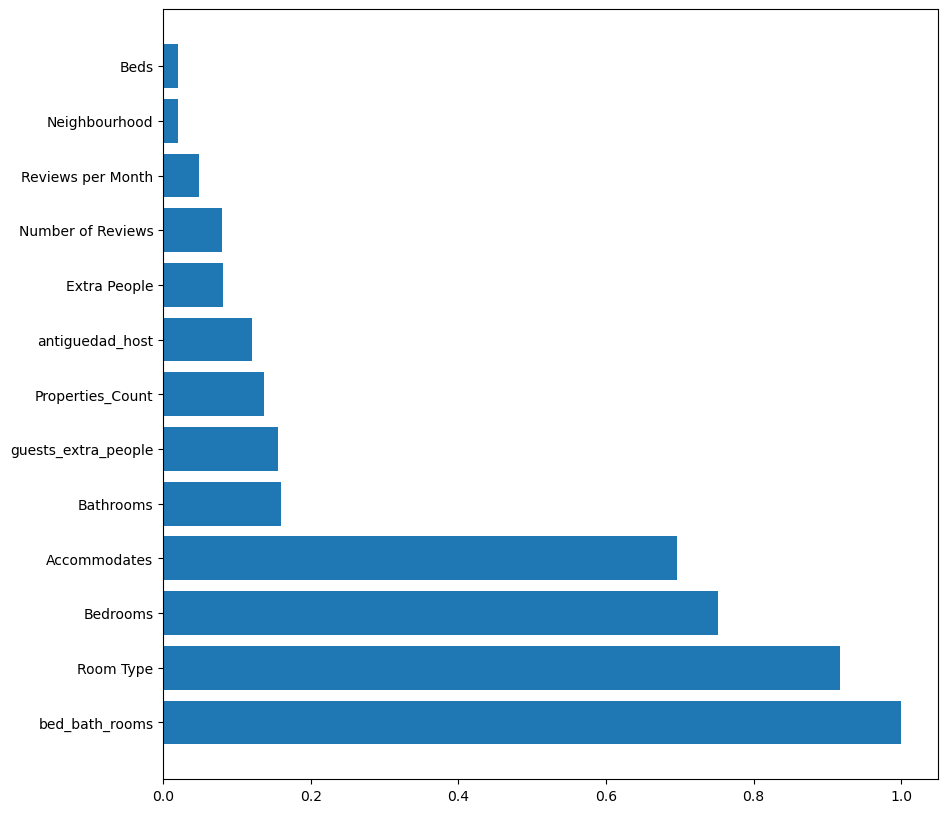

In [101]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), features[indices])
plt.show()

In [292]:
# Ahora trabajaremos con XGBoost

from xgboost import XGBRegressor

Niterations = [100, 200, 500, 1000, 1500, 2000]
learningRate = [0.1, 0.05, 0.01]
maxDepth = 12
param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}

grid = GridSearchCV(XGBRegressor(random_state = 0, max_depth = maxDepth), param_grid = param_grid)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.653
best parameters: {'learning_rate': 0.05, 'n_estimators': 100}


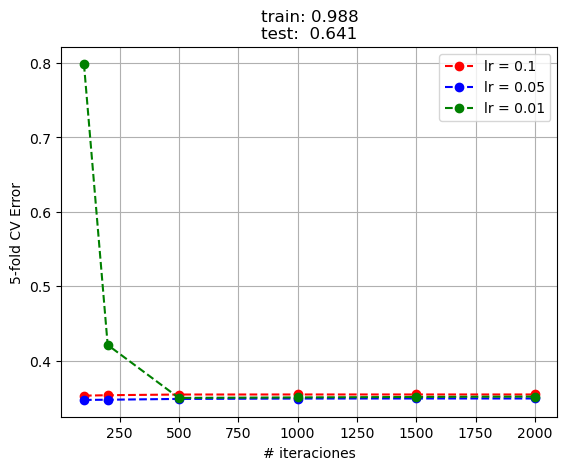

In [293]:
# NeOptimo = 100
# lrOptimo = 0.05
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']


xgb = XGBRegressor(random_state = 0, max_depth = maxDepth, learning_rate = lrOptimo, n_estimators = neOptimo,
                   reg_alpha = 0, reg_lambda = 0)
xgb.fit(X_train, y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))
colors = ['r','b','g','k','m']

for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error[i,:],colors[i] + '--o', label = 'lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(xgb.score(X_train,y_train),xgb.score(X_test,y_test)))
plt.grid()
plt.show()

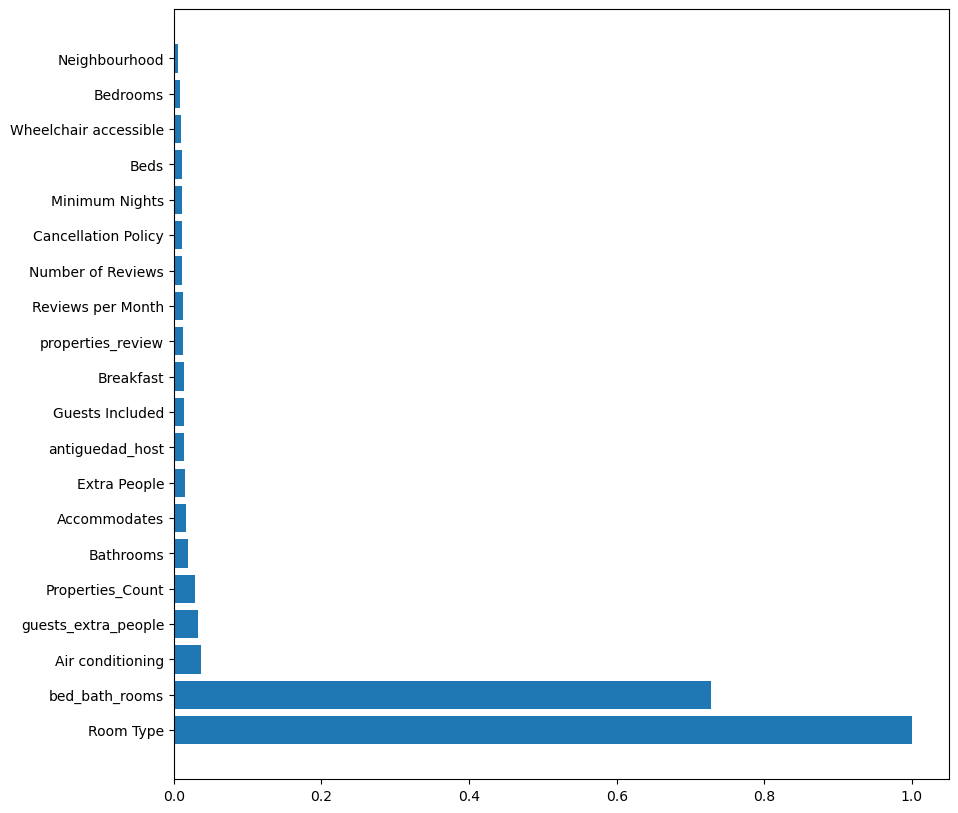

In [294]:
importances = xgb.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), features[indices])
plt.show()

In [316]:
# Trabajamos ahora con LightGBM

import lightgbm as lgb

Niterations = [100, 200, 300, 400, 500, 1000, 1500, 2000, 3000]
learningRate = [0.1, 0.05, 0.01, 0.001]
maxDepth = 10
param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}

grid = GridSearchCV(lgb.LGBMRegressor(random_state = 0, max_depth = maxDepth), param_grid = param_grid)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.686
best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}


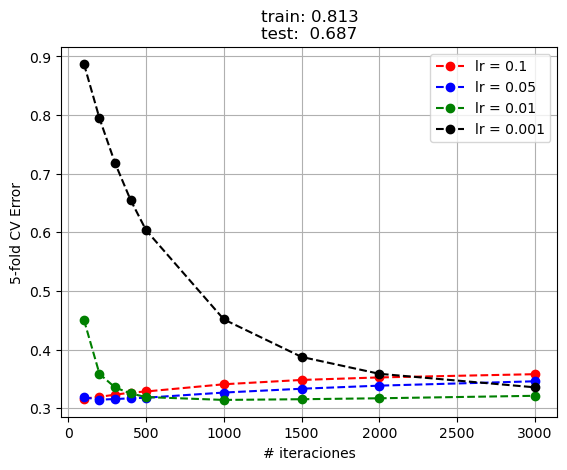

In [317]:
# neOptimo = 1000
# lrOptimo = 0.01
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']

lgbm = lgb.LGBMRegressor(random_state = 0, max_depth = maxDepth, learning_rate = lrOptimo, n_estimators = neOptimo)
lgbm.fit(X_train, y_train)

# Ver si lo imprimo así
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))
colors = ['r','b','g','k','m']

for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error[i,:],colors[i] + '--o', label = 'lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(lgbm.score(X_train,y_train),lgbm.score(X_test,y_test)))
plt.grid()
plt.show()

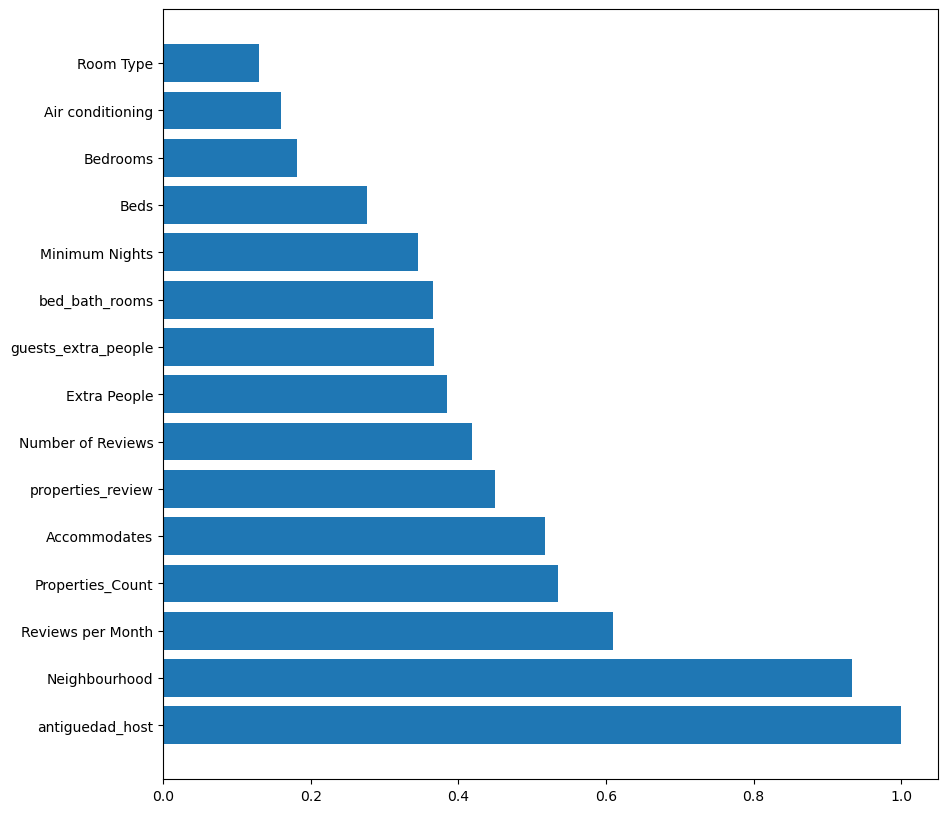

In [318]:
importances = lgbm.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), features[indices])
plt.show()

Una vez que hemos aplicado diferentes modelos a los datos, hemos visto que hay características comunes que todos los modelos nos indican que no son relevantes:
- WheelChair Accessible
- Breakfast
- TV
- Air Conditioning
- Property Type
- Cancelation Policy
- Minimum Nigths
- 


Podríamos decir por el otro lado, que las características más relevantes suelen ser  antiguedad_host, Neighbourhood, bed_bath_rooms, Beds y Room Type. Así que vamos a reanalizar para reducir la complejidad y el overfitting y tratar de mejorar el modelo

In [178]:
 VER ROOM TYPE, BEDROOMS, BATHROOMS, EXTRA PEOPLE

(9174, 20)


C:\Users\Conaf\AppData\Local\Temp\ipykernel_35976\1789343263.py:8: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./train.csv', sep=';', decimal='.')


,Neighbourhood,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Number of Reviews,Cancellation Policy,Reviews per Month,antiguedad_host,Properties_Count,TV,Air conditioning,Wheelchair accessible,Breakfast,bed_bath_rooms
0,0,0,0,1.0,1.0,2.0,60.0,1,0,2,53,1,3.05,1.463014,1,1,1,0,0,1.0
1,21,0,0,1.0,0.0,2.0,45.0,2,10,1,49,0,2.37,1.769863,1,0,0,0,0,0.0
2,5,19,1,2.0,1.0,1.0,20.0,1,0,2,3,0,3.00,0.336986,4,0,0,0,0,2.0
3,0,0,0,1.0,0.0,1.0,65.0,1,0,1,205,2,11.87,2.331507,3,1,1,0,0,0.0
4,0,14,0,1.0,3.0,5.0,95.0,4,20,1,34,1,1.87,1.671233,1,1,1,1,0,3.0


In [ ]:
Va